##**Proyecto Final - Machine Learning para Economistas**
## **CALIDAD DE VIDA**

> **Proyecto No. 4**

*Juan Felipe Yepes*

*Jennifer Paola Sanchez*

*Linda Camila Castañeda*

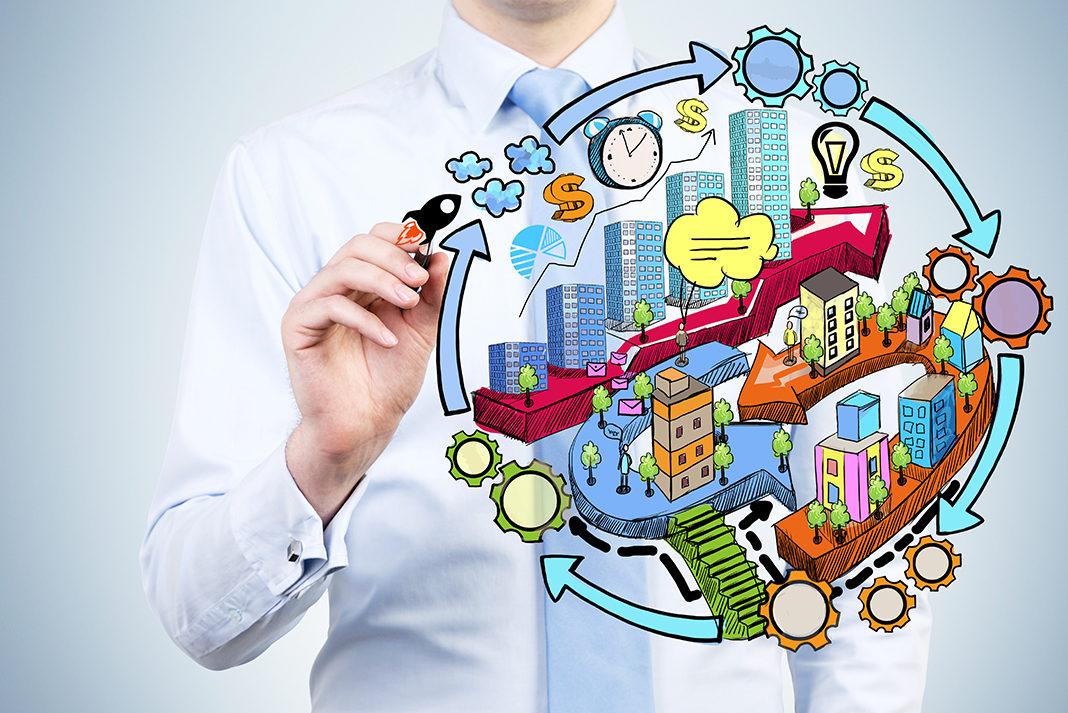

###**Objetivo de Estudio**
######Analizar los principales determinantes de la calidad de vida y evaluar su impacto en las ciudades más creativas del mundo para la mejora de dicho indicador. 

###**Descripción de la Base de Datos**
######El conjunto de datos fue extraído de Teleport.org que proporciona cifras relacionadas con la CALIDAD DE VIDA de las ciudades más creativas del mundo e intenta crear la base de datos más grande y actualizada de esta temática utilizando más de 300 dimensiones de datos, así como más de 70 fuentes de información diferentes. Entre estas se encuentran fuentes globales como el Banco Mundial, la Organización Mundial de la Salud, la ONU, entre otros y también fuentes locales de los diferentes países para abstraer asuntos legales, de regulación, precios inmobiliarios y cifras de mercado. 
######El fin de esta base de datos es proporcionarles a los usuarios información relevante para encontrar ciudades adecuadas para vivir y trabajar según sus preferencias individuales. Hay cifras de 266 ciudades de todos los continentes y así mismo en diferentes países.


###**Justificación de la Base de Datos**
###### El fin de tratar la presente base de datos recae en vislumbrar posibles estrategias de política pública para la mejora de la calidad de vida en las ciudades con bajos índices, a partir de una serie de variables estudiadas para las ciudades más destacadas en este indicador. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

QualityLife = pd.read_csv("/content/uaScoresDataFrame.csv", sep=",")
QualityLife

,Unnamed: 0,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.3730,3.1870,9.7385,4.1300
1,1,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310
2,2,Albuquerque,New Mexico,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,8.671000,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.3960,4.8900,7.0285,3.5155
3,3,Almaty,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,5.568000,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.8860,2.9370,6.5395,5.5000
4,4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.5230,8.8740,8.3680,5.3070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,261,Winnipeg,Canada,North America,7.5525,5.882,3.7965,0.000,1.4755,5.10450,8.966000,6.0155,7.755667,5.3440,5.67475,5.8405,7.2745,4.9025,4.6880,6.6590,4.2430
262,262,Wroclaw,Poland,Europe,8.4520,8.434,3.5860,2.386,2.2445,4.95475,5.704333,8.1655,6.781333,4.1615,4.96475,4.7615,5.0970,5.7615,4.7495,3.9045,4.0850
263,263,Yerevan,Armenia,Asia,9.6945,9.431,3.9265,0.000,1.7870,5.64925,6.501000,8.8730,5.102000,0.0000,4.43950,3.4580,8.0550,3.9000,4.7370,7.3465,7.7765
264,264,Zagreb,Croatia,Europe,8.9100,7.194,4.4530,1.775,2.0280,4.83000,5.720333,8.6575,7.266000,3.2110,7.33150,2.2365,7.9935,5.0335,4.9945,7.9545,4.8090


Existen 266 ciudades para cada una de las 21 categorías estudiadas por la base de datos. Sin embargo, si se observa detenidamente, la primera columna después del índice **"Unnamed"** no agrega valor a la base, por lo cual será retirada. 

In [ ]:
QualityLife = QualityLife.drop(columns="Unnamed: 0")

In [ ]:
QualityLife

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.3730,3.1870,9.7385,4.1300
1,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310
2,Albuquerque,New Mexico,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,8.671000,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.3960,4.8900,7.0285,3.5155
3,Almaty,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,5.568000,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.8860,2.9370,6.5395,5.5000
4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.5230,8.8740,8.3680,5.3070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Winnipeg,Canada,North America,7.5525,5.882,3.7965,0.000,1.4755,5.10450,8.966000,6.0155,7.755667,5.3440,5.67475,5.8405,7.2745,4.9025,4.6880,6.6590,4.2430
262,Wroclaw,Poland,Europe,8.4520,8.434,3.5860,2.386,2.2445,4.95475,5.704333,8.1655,6.781333,4.1615,4.96475,4.7615,5.0970,5.7615,4.7495,3.9045,4.0850
263,Yerevan,Armenia,Asia,9.6945,9.431,3.9265,0.000,1.7870,5.64925,6.501000,8.8730,5.102000,0.0000,4.43950,3.4580,8.0550,3.9000,4.7370,7.3465,7.7765
264,Zagreb,Croatia,Europe,8.9100,7.194,4.4530,1.775,2.0280,4.83000,5.720333,8.6575,7.266000,3.2110,7.33150,2.2365,7.9935,5.0335,4.9945,7.9545,4.8090


Esta ya es la base de datos sin la distorsión expuesta con anterioridad.

##**Análisis Exploratorio de la Base de Datos**

#### **Tipo y Descripción de Variables**

In [ ]:
QualityLife.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UA_Name                266 non-null    object 
 1   UA_Country             266 non-null    object 
 2   UA_Continent           266 non-null    object 
 3   Housing                266 non-null    float64
 4   Cost of Living         266 non-null    float64
 5   Startups               266 non-null    float64
 6   Venture Capital        266 non-null    float64
 7   Travel Connectivity    266 non-null    float64
 8   Commute                266 non-null    float64
 9   Business Freedom       266 non-null    float64
 10  Safety                 266 non-null    float64
 11  Healthcare             266 non-null    float64
 12  Education              266 non-null    float64
 13  Environmental Quality  266 non-null    float64
 14  Economy                266 non-null    float64
 15  Taxati


Se cuenta con un total de 20 variables, de las cuales las tres primeras son de tipo string porque corresponden a variables geográficas de lo más específico a lo global, específicamente se refieren al nombre de la ciudad, el país al que pertenece y el continente involucrado.
Las siguientes 17 variables son de tipo integer dado que están expresadas en “Teleport City Scores”, estos son puntajes que se le asignan a cada categoría que van de un rango del 0 al 10 de acuerdo con una serie de indicadores que hay detrás de cada una, los cuales se describirán a continuación por cada variable:
1.	HOUSING: Contempla el costo de una vivienda catalogada con dimensiones grandes, dimensiones medianas y dimensiones pequeñas, así mismo, un índice de la renta promedio.
2.	COST OF LIVING: Contempla el precio de una canasta de bienes y servicios que incluye un café, una cerveza, un kilo de manzanas, pan, un almuerzo, transporte publico mensual, inscripción al gimnasio, un boleto a cine, un recorrido en taxi de 5 kilómetros, precio de una comida en un restaurante y puntaje de inflación.
3.	STARTUPS: Contempla incremento mensual del número de startups, espacios de coworking, grupos de meet ups y eventos, miembros de las reuniones, numero de inversionistas, clima laboral y número total de los startups 
4.	VENTURE CAPITAL: Involucra dos factores que son el capital de riesgo y el número de aceleradores de financiación
5.	TRAVEL CONNECTING: Redes de conexión de transporte como lo son aeropuertos principales y conectividad de sistema férreo interurbano
6.	COMMUTE: Si la ciudad cuenta con página de ciudadanía humana y el manejo del tráfico
7.	BUSINESS FREEDOM: Aspectos como libertad de la corrupción, falta de restricciones laborales y duración promedio para abrir un negocio
8.	SAFETY: Aspectos de seguridad relacionados con tasa de criminalidad, muertes por año relacionadas con armas de fuego por cada 100.000 habitantes y armas por cada 100 habitantes
9.	HEALTHCARE: Indicadores como gasto en salud, calidad de la atención medica y expectativa de vida
10.	EDUCATION: Aspectos relacionados con la mejor universidad en ranking mundial, puntuaciones medias de los países en las pruebas PISA (lectura, ciencias, matemáticas), puntaje de estudiantes felices, porcentaje de alumnos de bajo rendimiento en las pruebas PISA (lectura, ciencias, matemáticas) y calidad universitaria.
11.	ENVIRONMENTAL QUALITY: Son cuatro criterios particulares referentes a calidad del aire, higiene del ambiente, calidad del agua potable y vegetación urbana
12.	ECONOMY: Se mide mediante la tasa de cambio por dólar en áreas urbanas, tasa de crecimiento del PIB y PIB per cápita.
13.	TAXATION: Contempla cinco categorías referentes a tasa efectiva de impuesto sobre las ganancias de la empresa como parte del pago de dividendos, impuestos sobre la renta, impuesto sobre ganancias netas, tiempo empleado para presentar los impuestos de la empresa e IVA
14.	INTERNET ACCESS: Contempla tanto la velocidad de carga y descarga (Mbps) como el acceso a Internet (carga y descarga) 
15.	LEISURE AND CULTURE: Contempla diferentes categorías de entretenimiento y cultura como galerías de arte, cines, clubes de comedia, espacios para conciertos, sitios históricos y museos, lugares de artes escénicas, instalaciones deportivas y zoológicos.
16.	TOLERANCE: Índice de igualdad LGBTI, Derechos de adopción LGBTI, Edad de consentimiento LGBTI, Regulaciones de donación de sangre, Legalidad de la discriminación LGBTI, Derechos de cambio de género LGBTI, Derechos de la homosexualidad LGBTI, Legalidad de la discriminación de vivienda LGBTI, Derechos matrimoniales LGBTI y Tolerancia hacia las minorías.
17.	OUTDOORS: Aspectos ambientales referentes a elevación (colinas o montañas), pico mediano en metros, acceso al mar, elevación del área urbana y acceso a fuentes de agua



###**Estadísticas Descriptivas**

In [ ]:
QualityLife[['Housing',	'Cost of Living',	'Startups','Venture Capital',	'Travel Connectivity',	'Commute',	'Business Freedom',	'Safety','Healthcare','Education',	'Environmental Quality',	'Economy',	'Taxation',	'Internet Access',	'Leisure & Culture',	'Tolerance', 'Outdoors']].describe()

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,6.467271,5.745940,4.595295,2.702515,3.446966,4.631770,7.330762,6.971635,6.796580,3.835224,6.078278,5.058141,4.953195,5.205013,5.710068,6.792742,4.492840
std,2.294482,2.447104,2.152841,2.553445,2.091628,1.523065,2.109427,1.746631,1.481896,2.213013,2.199913,1.517210,1.689790,1.872223,2.006776,1.724671,1.591771
min,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,1.343500,0.000000,0.000000,1.000000,0.000000,0.500000,1.000000,0.000000,1.406000,0.500000
25%,5.149500,4.795000,3.097500,0.000000,1.703250,4.399625,5.771417,5.972375,6.064083,2.184375,4.328688,4.103000,3.920500,4.134000,4.448125,5.779875,3.698625
50%,6.726000,5.630500,4.214000,2.317500,2.921500,5.064375,8.403667,7.188500,6.780500,4.273250,6.480750,5.373500,4.759750,5.378750,5.706750,7.154500,4.733000
75%,8.312750,7.595500,5.790375,3.764750,4.766000,5.613188,8.836667,8.269125,8.054500,5.294375,7.887625,6.514500,5.954500,6.265250,7.062500,8.052125,5.500000
max,10.000000,10.000000,10.000000,10.000000,10.000000,6.728500,10.000000,10.000000,9.320667,9.711000,9.953250,9.390000,10.000000,9.716000,10.000000,9.738500,7.933000


El índice de calidad de vida se mide para 266 ciudades. Para la mayor parte de las ciudades analizadas, los máximos de las variables doblan el mínimo en una significativa proporción, de modo que esto indica que las ciudades analizadas tienen altos niveles en calidad de vida. El puntaje máximo para el índice de calidad de vida es de 10.000 para varias categorías que inciden en el puntaje de calidad de vida, y el mínimo con 0.000. 

En términos generales, el costo de vivienda, el precio de la canasta de bienes y servicios, las redes de conexión de transporte, categorías culturales y de entretenimiento tienen una percepción muy marcada ya que el mínimo es de 0.00 y el máximo es de 10.00. De este modo se puede señalar que son categorías con una gran incidencia en la puntuación de los estándares de calidad de vida, para las ciudades analizadas en la base de datos. 


###**Análisis por Continente**

In [ ]:
Ciudades_por_continente = QualityLife['UA_Continent'].value_counts()
Ciudades_por_continente

Europe           111
North America     87
Asia              37
South America     15
Oceania            8
Africa             8
Name: UA_Continent, dtype: int64

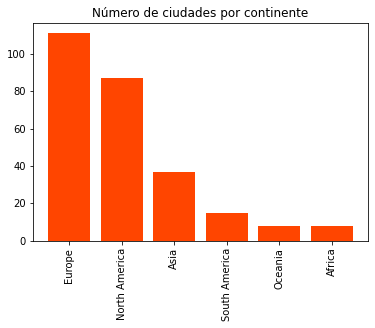

In [ ]:
fig, ax =plt.subplots()
ax.bar(Ciudades_por_continente.index, Ciudades_por_continente.values,
       color = "orangered")
plt.xticks(rotation = 90)
ax.set_title("Número de ciudades por continente")
plt.show()

Se cuenta con un total de 6 continentes, los cuales agrupan 266 ciudades, para las 21 categorías analizadas en la base de datos. Se puede evidenciar que el continente que reúne el mayor número de ciudades es Europa con el 42% del total de las ciudades observadas, y por el contario los continentes que reúne el menor numero de ciudades es Oceanía y África con un 6% del total de las ciudades. Teniendo en cuenta que son ciudades destacadas por determinantes de calidad de vida. 

Con la grafica podemos ejemplificar lo anteriormente dicho, en términos de calidad de vida Europa supera a Norteamérica y Asia, esto se debe a que las principales ciudades de Europa se caracterizan por tener una industria altamente integrada en el territorio, en términos generales las grandes ciudades y zonas rurales se destacan por su buena puntuación en indicadores ambientales y socioeconómicos. En cuanto a Norteamérica y Asia, igualmente cuentan con estándares de calidad de vida amplios, esto porque en su mayoría suelen tener cubiertas sus necesidades básicas, y por las eficientes políticas económicas que elevan la expectativa de vida de sus habitantes. Finalmente, para los continentes de sur América, Oceanía y África, son los que tienen menor cantidad de países con características en calidad de vida.


###**Variables Predominantes según la Literatura**
 
La trayectoria de la literatura económica y fuentes como el Banco Mundial, la Organización Mundial de la Salud, el Fondo Monetario Internacional, la ONU y la CEPAL hacen evidente la idea de que el concepto de calidad de vida se caracteriza por su multidimensionalidad y no se puede reducir a un solo ámbito ya que resultaría insuficiente el análisis. Por lo tanto, para este proyecto se toma una serie de variables relacionadas con diferentes áreas de estudio. 
Sin embargo, en la revisión de la literatura hay 5 categorías predominantes que impulsan en mayor medida que un individuo cuente con mayor calidad de vida y así mismo, ayudan a cuantificar-caracterizar las condiciones de vida de los habitantes. En la misma línea, de acuerdo con las anteriores instituciones quienes promueven constantemente el desarrollo social en las economías en la búsqueda de sociedades más resilientes, las categorías son las siguientes:

1.En primer lugar, se toma la variable “ECONOMY” que involucra el crecimiento económico y la riqueza de la ciudad porque el ingreso siempre ha sido una variable que satisface las preferencias de los individuos; un mayor ingreso está directamente relacionado con un empoderamiento reflejando así un mayor bienestar y, por lo tanto, resultando en una mejora de la calidad de vida.

2.Los indicadores de vivienda cada vez recobran mayor importancia en los análisis de calidad de vida porque cada vez es mayor la satisfacción alcanzada por los usuarios al habitar una vivienda propia. Por lo anterior, se prioriza la variable de “HOUSING”.

3.Por otra parte, tenemos dos factores clave que son “HEALTHCARE” y “EDUCATION”
que se encuentran dentro de la dimensión personal de los factores determinantes de la calidad de vida o dentro del conjunto micro de los aspectos influyentes. Los estudios científicos han demostrado que la salud aporta significativamente al bienestar subjetivo y la educación a la felicidad.

4.Por último, “SAFETY” ya que represente un desafío social dentro de las economías y se involucra dentro de la dimensión material de la calidad de vida, hace parte de las condiciones del entorno social y constituye una de las mayores preocupaciones sociales del momento.



#### **Housing**

In [ ]:
QualityLifeHousing = QualityLife[["UA_Name","Housing"]]
QualityLifeHousing.sort_values('Housing',ascending=[False])

,UA_Name,Housing
119,Kathmandu,10.000
58,Chennai,10.000
110,Hyderabad,10.000
48,Cairo,10.000
247,Tunis,9.968
...,...,...
138,London,1.000
212,San Francisco Bay Area,1.000
107,Hong Kong,1.000
182,Palo Alto,0.500


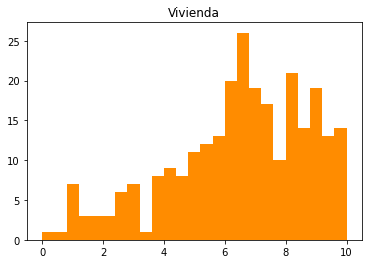

In [ ]:
fig, ax = plt.subplots()
ax.hist(QualityLife["Housing"], color = "darkorange", bins = 25)
ax.set_title("Vivienda")
plt.show()

In [ ]:
QualityLife.groupby("UA_Continent")["Housing"].agg([min, max, np.mean, np.median])

,min,max,mean,median
UA_Continent,,,,
Africa,6.7635,10.0000,8.479375,8.41700
Asia,1.0000,10.0000,7.229608,8.30300
Europe,1.0000,9.7780,6.669059,6.92850
North America,0.0000,9.5270,5.514661,6.12850
Oceania,1.9865,6.9340,5.044937,5.17325
South America,4.7240,9.4295,8.304200,8.81200


En el ranking de esta categoría, dentro de los primeros cinco puestos encontramos 4 ciudades con una puntuación máxima de 10 que pertenecen al continente de Asia seguido de Tunes de África con una puntuación no muy alejada (9.968), estas posiciones se deben a que las ciudades que lideran la lista cuentan con indicadores de vivienda muy favorables con apartamentos de diferentes dimensiones entre los 200 a 400 dólares, lo que hace que sea más fácil acceder a una vivienda propia en condiciones habitables de buena calidad. Por el contrario, nos encontramos con los últimos 4 puestos que corresponden en su mayoría a ciudades de Norte América donde es más costoso el acceso a una vivienda propia y se evidencia en los indicadores del costo de las viviendas que valen más de 1.500 dólares, por lo que la mayoría de los ciudadanos deben remitirse a una modalidad de renting.

Con respecto a la distribución de las diferentes ciudades en las puntuaciones obtenidas para la variable, hay un sesgo a la derecha donde se concentran las mayores frecuencias alrededor de un score de 6.5 y en un rango de 8.2 a 9, lo que indica que así existan ciudades que no tengan un score muy favorable, la mayoría tienen programas o un alto acceso a vivienda en las tres dimensiones evaluadas (pequeña, mediana y grande).

Por último, en el análisis por continentes, aunque los mayores scores los tenga Asia y África, hay un liderazgo de Suramérica con un score promedio de 8.8, en esta región se encuentra el menor mínimo con 4.7 mientras que en continentes como Norte América y Asia hay una variedad más amplia de puntuaciones que van desde 0 y 1 hasta 9.7 y 10, por lo que encontraríamos ciudades categorizadas como insuficientes en este indicador, pero también con un indicador de excelente calidad.


#### **Safety**

In [ ]:
QualityLifeSafety = QualityLife[["UA_Name", "Safety"]]
QualityLifeSafety.sort_values('Safety',ascending=[False])

,UA_Name,Safety
177,Osaka,10.0000
244,Tokyo,10.0000
125,Kyoto,10.0000
226,Singapore,9.9715
91,Fukuoka,9.9450
...,...,...
16,Baltimore,2.3730
259,Washington,2.1915
170,New Orleans,2.0880
30,Birmingham,1.7760


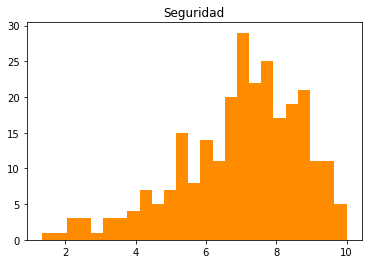

In [ ]:
fig, ax = plt.subplots()
ax.hist(QualityLife["Safety"], color = "darkorange", bins = 25)
ax.set_title("Seguridad")
plt.show()

In [ ]:
QualityLife.groupby("UA_Continent")["Safety"].agg([min, max, np.mean, np.median])

,min,max,mean,median
UA_Continent,,,,
Africa,5.1655,8.2915,6.302938,6.0500
Asia,5.7285,10.0000,7.999230,7.8370
Europe,5.2520,9.6165,7.984090,8.0325
North America,1.3435,8.6335,5.392632,5.4025
Oceania,7.0215,8.2230,7.558375,7.5780
South America,5.2210,7.4770,6.146667,6.0395


En primera medida, algo que resaltar del ranking en sus primeras 5 posiciones, es que todas pertenecen al continente asiático, por lo que allí encontraríamos a las ciudades más seguras por contar con tasas de criminalidad bajas, en un rango leve de muertes acudiendo a la violencia y con un pequeño número de armas para los habitantes, adicionalmente, algo por destacar es que 4 de ellas son de Japón, obteniendo calificación más alta con un score de 10. En segundo lugar, para las últimas posiciones se encuentran ciudades de Norte América, de los diferentes Estados de USA con puntuaciones muy bajas y siendo los lugares más inseguros debido a una razón principal que corresponde a que no se cuenta con un sistema bien regularizado en torno al uso de armas lo que hace que las tasas de criminalidad sean elevadas.

Para la distribución de la variable, es evidente que inicia con una tendencia incremental, es decir de la menor a la mayor frecuencia y lo anterior hace que se visualice un sesgo hacia la derecha con un pico en un score alrededor de 7, luego en oposición cambia su comportamiento demostrando una tendencia decreciente. Sin embargo, la mayoría de las observaciones se encuentran en el rango de 6.5 a 8.

Finalmente, en torno a los continentes es evidente que la seguridad promedio en las ciudades de Asia y Europa lideran la categoría con un score de 7.9 y por el contrario, en Norte América y África se encuentran los score más críticos con 5.3 y 6.3 respectivamente por contar con las ciudades más peligrosas, sobre todo en Estados Unidos donde se encuentra el score mínimo de 1.3, muy por debajo si calculáramos el promedio de los score obtenidos por los demás continentes, que están por encima de 5.


#### **Healthcare**

In [ ]:
QualityLifeHealthcare = QualityLife[["UA_Name", "Healthcare"]]
QualityLifeHealthcare.sort_values('Healthcare',ascending=[False])


,UA_Name,Healthcare
28,Bilbao,9.320667
128,Las Palmas de Gran Canaria,9.214333
91,Fukuoka,9.098000
125,Kyoto,9.078667
133,Lille,9.071000
...,...,...
73,Dar es Salaam,3.238667
95,Gibraltar,3.023333
187,Phnom Penh,2.984000
126,Lagos,2.862333


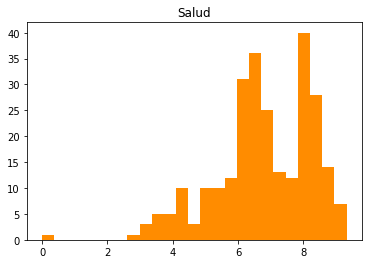

In [ ]:
fig, ax = plt.subplots()
ax.hist(QualityLife["Healthcare"], color = "darkorange", bins = 25)
ax.set_title("Salud")
plt.show()

In [ ]:
QualityLife.groupby("UA_Continent")["Healthcare"].agg([min, max, np.mean, np.median])

,min,max,mean,median
UA_Continent,,,,
Africa,2.862333,6.292667,4.061833,3.844833
Asia,2.984000,9.098000,5.873495,5.950333
Europe,0.000000,9.320667,7.600631,8.039333
North America,4.363333,8.269000,6.465391,6.430000
Oceania,7.936667,8.317667,8.114583,8.068833
South America,4.178333,7.066000,5.800044,5.710667


Lo que se puede evidenciar a primera vista al contrario de las dos primeras categorías es que ninguna ciudad obtiene un puntaje de 10, por lo que a nivel mundial se requiere de esfuerzos adicionales en torno al gasto en salud y la mejora de cobertura y calidad de los sistemas de salud para aumentar así la expectativa de vida. Sin embargo, dentro de las primeras cinco posiciones se encuentran ciudades de Asia y Europa que siguen el modelo de Estado de Bienestar y, por lo tanto, priorizan la salud como el ámbito más importante dentro de sus planes de Gobierno. Por otra parte, dentro de las últimas posiciones hay una variedad de ciudades de tres continentes: Europa, África y Asia, el caso más crítico se encuentra en Andorra dado que manejan un sistema de salud centralizado, es decir la regulación se concentra en un solo organismo.

Con respecto a la distribución de la variable, son muy pocos los países catalogados como “creativos” que cuentan con calificaciones pésimas incluso la mayoría se ubican en el rango de 6 a 8. Sin embargo, esto se debe a que el 42% de las observaciones pertenecen al continente europeo donde se prioriza el ámbito de la salud.

Por último, es evidente como el sistema de salud más precario a nivel de promedio por continentes se encuentra en África con un score de 4.06, seguido por Suramérica y Asia; liderando el promedio los continentes de Europa y Oceanía. Sin embargo, tanto el mínimo (0.0) como el máximo (9.3) a la vez se encuentra en una ciudad de Europa (Andorra y Bilbao respectivamente).


#### **Education**

In [ ]:
QualityLifeEducation = QualityLife[["UA_Name", "Education"]]
QualityLifeEducation.sort_values('Education',ascending=[False])


,UA_Name,Education
107,Hong Kong,9.7110
138,London,9.0270
139,Los Angeles,8.6245
35,Boston,8.6245
212,San Francisco Bay Area,8.6245
...,...,...
214,San Juan,0.0000
54,Casablanca,0.0000
198,Quito,0.0000
23,Belize City,0.0000


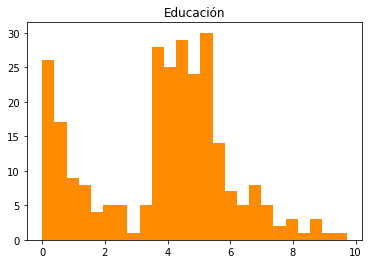

In [ ]:
fig, ax = plt.subplots()
ax.hist(QualityLife["Education"], color = "darkorange", bins = 25)
ax.set_title("Educación")
plt.show()

In [ ]:
QualityLife.groupby("UA_Continent")["Education"].agg([min, max, np.mean, np.median])

,min,max,mean,median
UA_Continent,,,,
Africa,0.000,0.8945,0.394125,0.5000
Asia,0.000,9.7110,2.685243,1.6875
Europe,0.000,9.0270,4.383486,4.5490
North America,0.000,8.6245,4.286149,4.2120
Oceania,4.756,6.7255,5.463813,5.1425
South America,0.000,2.6415,0.966000,1.0170


Analizando una de las variables predominantes para el índice de calidad de vida, podemos ver que las ciudades que tienen mejor puntaje a nivel de educación pertenecen al continente de Asia, Europa y Norteamérica. Ya que hacen parte de países que cumplen con ciertos indicadores de contexto; como lo son las condiciones socioeconómicas, aspectos culturales, estatus profesional del profesorado, entre otros indicadores que permiten que estas ciudades tengan altos niveles en educación y mejoras en su nivel de calidad de vida.

De la misma forma, se puede observar las ciudades que tienen los índices más bajos a nivel de educación, cuentan con una calificación muy baja en cuanto al desempeño académico de los jóvenes que se mide en la prueba PISA, que no alcanzan el mínimo que la OCDE considera exigible en desempeño académico.
 
Para los seis continentes analizados de la variable de educación, se puede ver que la mayoría de los máximos es mayor en una gran proporción que los mínimos de esta variable, lo que nos muestra una gran brecha en el puntaje de los niveles de educación. Exceptuando el continente de Oceanía que cuenta con un máximo de 6.725 y un mínimo de 4.756. No obstante el continente que tiene el índice más alto en educación es Asia. 



#### **Economy**

In [ ]:
QualityLifeEconomy = QualityLife[["UA_Name", "Economy"]]
QualityLifeEconomy.sort_values('Economy',ascending=[False])


,UA_Name,Economy
78,Doha,9.3900
80,Dubai,7.8860
92,Galway,7.5145
81,Dublin,7.5145
70,Cork,7.5145
...,...,...
120,Kiev,1.2755
142,Lviv,1.2755
95,Gibraltar,0.0000
214,San Juan,0.0000


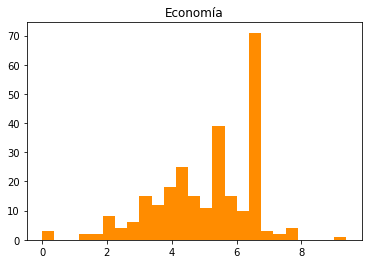

In [ ]:
fig, ax = plt.subplots()
ax.hist(QualityLife["Economy"], color = "darkorange", bins = 25)
ax.set_title("Economía")
plt.show()

In [ ]:
QualityLife.groupby("UA_Continent")["Economy"].agg([min, max, np.mean, np.median])

,min,max,mean,median
UA_Continent,,,,
Africa,2.7680,5.5000,3.714688,3.13275
Asia,2.3870,9.3900,5.043851,5.02650
Europe,0.0000,7.5145,4.595306,4.69100
North America,0.0000,6.5145,6.015661,6.51450
Oceania,5.5055,6.0695,5.858000,6.06950
South America,1.9780,4.5945,3.254667,3.16250


En términos generales esta variable se mide por medio de la tasa de cambio, el nivel de crecimiento del PIB y PIB per cápita, siendo una variable muy diciente para puntuaciones de la calidad de vida de las ciudades. Se puede señalar que las ciudades que tienen la mejor puntación en cuanto a indicadores económicos, pertenecen al continente de Asia y Europa. Este puesto en la puntuación se debe a que son ciudades con los más altos niveles de ingreso per cápita del mundo, y cuentan con un sistema de bienestar altamente desarrollado, también cuentan con las tasas más bajas de desempleo en comparación con los demás países desarrollados. 

De la misma forma las ciudades con los puntajes mas bajos en esta variable de economía, pertenecen en su mayoría al continente europeo. 
En términos generales el puntaje máximo para la variable economía es de 9.3900 para Asia, y un mínimo de 0.000 para dos continentes que es Europa y Norteamérica. Las diferencias en la percepción de esta variable entre los seis continentes analizados son excesivas. Se refleja que en los continentes de Europa y en Norteamérica, es donde están las ciudades con menores índices de crecimiento del PIB y PIB per cápita. 




###**Agrupamiento de las Variables**

Las 17 variables se van a agrupar a partir de categorías macro, de la siguiente manera: 

1. **Variables Económicas**: Housing, Economy y Taxation.
2. **Variables Culturales y Sociales**: Internet Access, Leisure & Culture y Tolerance.
3. **Variables Demográficas**: Cost of Living, Commute, Safety, Healhcare, Education y Travel Connectivity.
4. **Variables Empresariales**: Startups, Business Freedom y Venture Capital.
5. **Variables Ambientales**: Environmental Quality y Outdoors. 





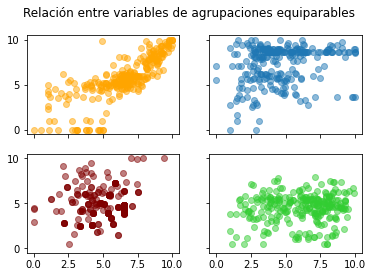

In [ ]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)

ax[0, 0].scatter(QualityLife["Housing"], QualityLife["Cost of Living"],
                 color = "orange",alpha = 0.5)
ax[0, 1].scatter(QualityLife["Startups"], QualityLife["Business Freedom"],
                 alpha = 0.5)
ax[1, 0].scatter(QualityLife["Economy"], QualityLife["Taxation"],
                 color = "maroon",alpha = 0.5)
ax[1, 1].scatter(QualityLife["Environmental Quality"], QualityLife["Outdoors"],
                 color = "limegreen",alpha = 0.5)

fig. suptitle("Relación entre variables de agrupaciones equiparables")

plt.show()

Al realizar una serie de Scatter plots entre variables de agrupaciones equiparables, se encuentra que: en primer lugar (gráfico amarillo), existe una relación en cierta medida directa entre "housing" y "cost of living", esto indica que los scores de la primera variable cuentan con una correspondencia de los scores de segunda, y viceversa, y expone que existe una relación positiva entre unos mayores costes de vivienda para todas las dimensiones, así como de renta, y los precios de las canastas de bienes y servicios, transporte público mensual, comidas fuera del hogar y puntaje de inflación para las ciudades estudiadas. 

Posteriormente, en el segundo gráfico (azul), se puede observar que no existe una relación marcada entre la variable "startups", que contempla el incremento mensual del número de startups, espacios de coworking, entre otros, y la variable "business freedom", que incluye aspectos como la libertad de la corrupción, la falta de restricciones laborales y la duración promedio para abrir un negocio. No obstante, se puede observar que existe una concentración de datos en la parte superior, y algunos outliers en la parte inferior izquierda.  

En tercer lugar, en el gráfico rojo oscuro, se puede observar que no existe una relación fuerte o marcada entre las variables "Economy" que incluye la tasa de cambio por dólar en áreas urbanas, tasa de crecimiento del PIB y PIB per cápita, y "Taxation", que contempla categorías referentes a las tasas impositivas efectivas sobre las ganancias de las empresas. No obstante, existen algunos outliers en la parte superior derecha. 

Por último, en cuanto a la relación entre las variables "environmental quality", que se refiere a criterios sobre la calidad del aire, higiene del ambiente, calidad del agua potable, etc, y "outdoors", que agrupa aspectos relacionados a elevación de la ciudad, acceso al mar, acceso a fuentes de agua, entre otras, se encuentra que no existe una relación fuerte ni directa entre las variables. Lo que si se podría aceverar, es que los datos estan relativamente más concentrados hacia los valores cercanos a 5 en el eje y, y 7.5 en el eje x, lo que podría indicar una muy leve relación inversa entre variables. 



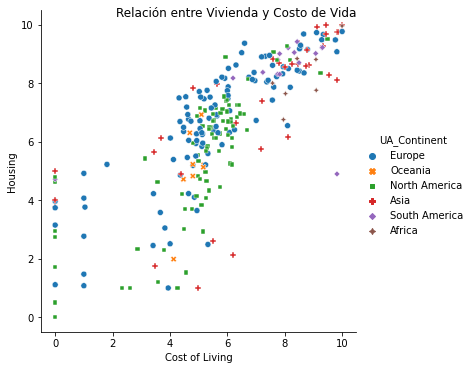

In [ ]:
VariablesVivienda = sns.relplot(x = "Cost of Living", y = "Housing", 
                data = QualityLife,
                kind = "scatter",
                style = "UA_Continent",
                hue = "UA_Continent")
VariablesVivienda.fig.suptitle("Relación entre Vivienda y Costo de Vida")
plt.show()



En este scatter plot entre "housing" y "cost of living", se puede evidenciar la relación directa y fuerte entre variables expuesta en el anterior apartado. Ahora bien, relacionado con los datos de las ciudades por continente, se puede observar que:
1. Existen, en primer lugar, varias ciudades de distintos continentes con valores de 0 para cost of living.
2. Se puede observar una gran cantidad de puntos azules, los cuales corresponden a ciudades del continente europeo, seguidos por cuadrados verdes, pertenecientes a ciudades del continente norteamericano. 
3. Aunque existan distinto número de ciudades para cada uno de los continentes, todos los datos siguen la tendencia directa y fuerte entre las variables "housing" y "cost of living" expuesta con anterioridad. 



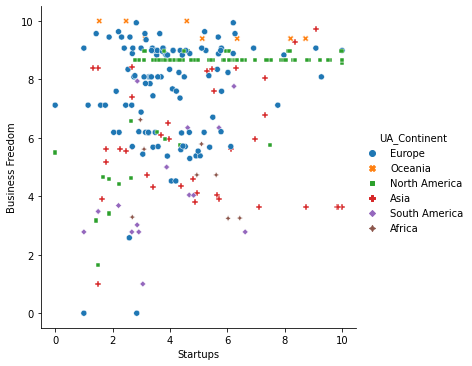

In [ ]:
VariablesEmprendimiento = sns.relplot(x = "Startups", y = "Business Freedom", 
                data = QualityLife,
                kind = "scatter",  
                style = "UA_Continent",
                hue = "UA_Continent")
VariablesEmprendimiento.fig.suptitle("Relación entre Libertad para Hacer Negocios y Startups")
plt.show()

En el scatter plot entre "business freedom" y "startups" se puede observar el resultado expuesto en los subplots para la agrupación de estas dos variables: ninguna relación en particular entre las variables. No obstante, es posible resaltar una serie de aspectos:

1. Se puede ver que la fuerte concentración de datos hacia valores entre 8 y 10 en business freedom se debe, fundamentalmente, a que la mayoría de las ciudades pertenecientes al continente americano, cuentan con el mismo score para "business freedom", el cual es un número entre 8 y 9. 
2. Existe una gran cantidad de outliers hacia la parte inferior e inferior izquierda, particularmente provenientes de ciudades de los continentes África, Asia y Sur América. 
3. Los valores de las ciudades europeas (círculos azules) están, en su mayoría, agrupados hacia valores altos de "business freedom", pero bajos en "startups". 

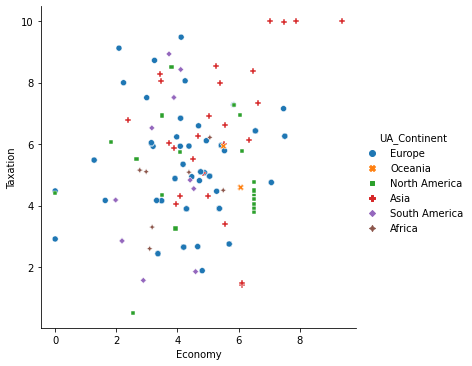

In [ ]:
VariablesEconomia = sns.relplot(x = "Economy", y = "Taxation", 
                data = QualityLife,
                kind = "scatter",
                style = "UA_Continent",
                hue = "UA_Continent")
VariablesEconomia.fig.suptitle("Relación entre Taxación y Economía")
plt.show()

En el scatter plot entre "taxation" y "economy" se puede observar que no existe ningún tipo de relación fuerte entre variables, ni directa, ni inversa. Los datos de todos los continentes están dispersos de manera uniforme en todo el espacio de la gráfica. No obstante, se puede observar que los outliers de la parte superior derecha corresponden a ciudades del continente asiático, además de una serie de valores cercanos a 6 iguales para varias ciudades norteamericanas (fila de cuadrados verdes). 





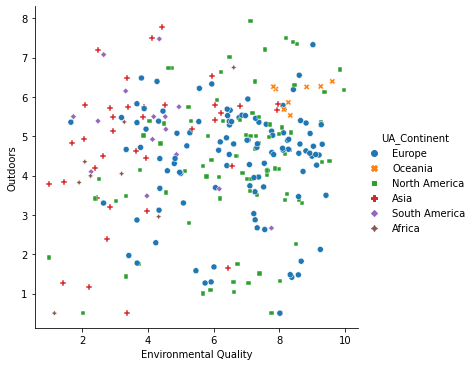

In [ ]:
VariablesAmbiente = sns.relplot(x = "Environmental Quality", y = "Outdoors", 
                data = QualityLife,
                kind = "scatter",
                style = "UA_Continent",
                hue = "UA_Continent")
VariablesAmbiente.fig.suptitle("Relación entre Calidad del Medio Ambiente y Espacios al Aire Libre")
plt.show()



De la misma manera que en el anterior scatter plot, se puede observar que entre las variables "outdoors" y "environmental quality" no existe una relación fuerte, ni inversa, ni directa. Los datos para todas las ciudades de los continentes están dispersos de manera uniforme a lo largo del gráfico. No obstante se puede observar una leve brecha entre los valores (al rededor del 2 en el eje de "outdoors"). 



###**Comparativa Bogotá y Medellín**

In [ ]:
filtro_colombia = [" Colombia"]
QualityLife[QualityLife["UA_Country"].isin(filtro_colombia)]

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
31,Bogota,Colombia,South America,9.0275,9.080,5.7085,1.259,1.889,4.9640,6.348667,6.222,6.301667,1.534,4.34750,4.5945,1.8515,2.9760,6.215,8.5555,7.477
152,Medellin,Colombia,South America,9.2315,9.315,4.6180,0.000,0.928,5.3545,6.348667,7.477,6.790667,1.531,6.17075,4.5945,1.8515,4.1485,5.029,9.3020,3.662


Se realiza un análisis comparativo entre las dos ciudades más grandes de Colombia que son Bogotá y Medellín, respecto a las variables que inciden en la calidad de vida. De modo que, podemos ver una gran diferencia en variables como; Venture capital que involucra factores de capital de riesgo y aceleradores financieros, donde el puntaje para Bogotá es de 1.889 el cual refleja una mejor puntuación en cuanto al financiamiento de las empresas que están en proceso de desarrollo, para Medellín el puntaje es de 0.928. En cuanto a las demás variables no hay una mayor diferencia entre las dos ciudades, por ejemplo, Economy y Taxation, tienen el mismo puntaje, de lo que podemos decir que estas grandes ciudades la tasa de crecimiento aumenta en una proporción similar. Cabe resaltar que Bogotá tienen una cantidad superior de población que Medellín.

##**Aprendizaje no Supervisado**
El siguiente apartado se realizó en un Google Colab adaptado al lenguaje de programación de R, para posteriormente adjuntar sus resultados en el presente archivo.

###**Exploración y Transformación de los datos con R**

In [ ]:
install.packages('readxl')
install.packages('corrplot')
install.packages('FactoMineR')
install.packages('factoextra')
install.packages('cluster')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggrepel’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘viridis’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘dendextend’, ‘ggpubr’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(readxl)
library(corrplot)
library(FactoMineR)
library(factoextra)
library(cluster)

corrplot 0.90 loaded

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [ ]:
QualityLife = read.csv('/content/uaScoresDataFrame.csv', sep = ',', dec = '.'); print(head(QualityLife))

  X     UA_Name   UA_Country  UA_Continent Housing Cost.of.Living Startups
1 0      Aarhus      Denmark        Europe  6.1315          4.015   2.8270
2 1    Adelaide    Australia       Oceania  6.3095          4.692   3.1365
3 2 Albuquerque   New Mexico North America  7.2620          6.059   3.7720
4 3      Almaty   Kazakhstan          Asia  9.2820          9.333   2.4585
5 4   Amsterdam  Netherlands        Europe  3.0530          3.824   7.9715
6 5   Anchorage       Alaska North America  5.4335          3.141   2.7945
  Venture.Capital Travel.Connectivity Commute Business.Freedom Safety
1           2.512              3.5360 6.31175         9.940000 9.6165
2           2.640              1.7765 5.33625         9.399667 7.9260
3           1.493              1.4555 5.05575         8.671000 1.3435
4           0.000              4.5920 5.87125         5.568000 7.3090
5           6.107              8.3245 6.11850         8.836667 8.5035
6           0.000              1.7380 4.71525         8

Al importar la base de datos en R, se puede observar que, con el fin de poder realizar aprendizaje no supervisado, se deben colocar a las ciudades como índice de la base, y quitar de la misma la columna "X" que no añade valor a la base, el nombre del país y el nombre del continente. 

In [ ]:
rownames(QualityLife) = unclass(QualityLife$UA_Name); print(head(QualityLife))

            X     UA_Name   UA_Country  UA_Continent Housing Cost.of.Living
Aarhus      0      Aarhus      Denmark        Europe  6.1315          4.015
Adelaide    1    Adelaide    Australia       Oceania  6.3095          4.692
Albuquerque 2 Albuquerque   New Mexico North America  7.2620          6.059
Almaty      3      Almaty   Kazakhstan          Asia  9.2820          9.333
Amsterdam   4   Amsterdam  Netherlands        Europe  3.0530          3.824
Anchorage   5   Anchorage       Alaska North America  5.4335          3.141
            Startups Venture.Capital Travel.Connectivity Commute
Aarhus        2.8270           2.512              3.5360 6.31175
Adelaide      3.1365           2.640              1.7765 5.33625
Albuquerque   3.7720           1.493              1.4555 5.05575
Almaty        2.4585           0.000              4.5920 5.87125
Amsterdam     7.9715           6.107              8.3245 6.11850
Anchorage     2.7945           0.000              1.7380 4.71525
            B

Se pone el nombre de la ciudad como índice de la base.

In [ ]:
QualityLife = QualityLife[, -c(1:4)]; print(head(QualityLife))

            Housing Cost.of.Living Startups Venture.Capital Travel.Connectivity
Aarhus       6.1315          4.015   2.8270           2.512              3.5360
Adelaide     6.3095          4.692   3.1365           2.640              1.7765
Albuquerque  7.2620          6.059   3.7720           1.493              1.4555
Almaty       9.2820          9.333   2.4585           0.000              4.5920
Amsterdam    3.0530          3.824   7.9715           6.107              8.3245
Anchorage    5.4335          3.141   2.7945           0.000              1.7380
            Commute Business.Freedom Safety Healthcare Education
Aarhus      6.31175         9.940000 9.6165   8.704333    5.3665
Adelaide    5.33625         9.399667 7.9260   7.936667    5.1420
Albuquerque 5.05575         8.671000 1.3435   6.430000    4.1520
Almaty      5.87125         5.568000 7.3090   4.545667    2.2830
Amsterdam   6.11850         8.836667 8.5035   7.907333    6.1800
Anchorage   4.71525         8.671000 3.4705   6.06

Se quitan las variables mencionadas anteriormente, dejando solo las 17 númericas útiles para los análisis de aprendizaje no supervisado. 

In [ ]:
print(sapply(QualityLife, class))

              Housing        Cost.of.Living              Startups 
            "numeric"             "numeric"             "numeric" 
      Venture.Capital   Travel.Connectivity               Commute 
            "numeric"             "numeric"             "numeric" 
     Business.Freedom                Safety            Healthcare 
            "numeric"             "numeric"             "numeric" 
            Education Environmental.Quality               Economy 
            "numeric"             "numeric"             "numeric" 
             Taxation       Internet.Access     Leisure...Culture 
            "numeric"             "numeric"             "numeric" 
            Tolerance              Outdoors 
            "numeric"             "numeric" 


Con el comando sapply, se puede observar que todas las variables son numéricas, es decir, que no hay que realizar ningún cambio adicional sobre las mismas. 

##**Análisis de Correlaciones**

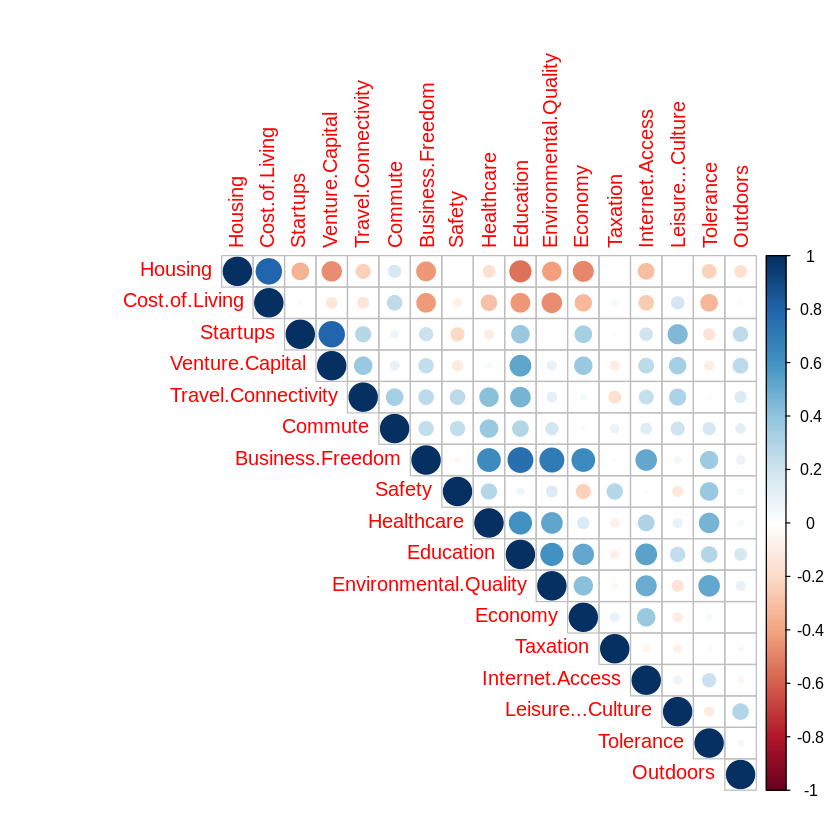

In [ ]:
corrplot(cor(QualityLife), type="upper")

In [ ]:
round(cor(QualityLife),2)

,Housing,Cost.of.Living,Startups,Venture.Capital,Travel.Connectivity,Commute,Business.Freedom,Safety,Healthcare,Education,Environmental.Quality,Economy,Taxation,Internet.Access,Leisure...Culture,Tolerance,Outdoors
Housing,1.00,0.80,-0.34,-0.46,-0.24,0.18,-0.43,0.01,-0.17,-0.55,-0.42,-0.49,-0.01,-0.30,-0.01,-0.23,-0.17
Cost.of.Living,0.80,1.00,0.03,-0.13,-0.14,0.26,-0.42,-0.08,-0.29,-0.43,-0.47,-0.33,0.05,-0.26,0.19,-0.34,-0.03
Startups,-0.34,0.03,1.00,0.80,0.28,0.07,0.21,-0.21,-0.09,0.38,0.01,0.34,-0.02,0.19,0.45,-0.15,0.25
Venture.Capital,-0.46,-0.13,0.80,1.00,0.37,0.10,0.25,-0.12,0.03,0.53,0.10,0.37,-0.10,0.27,0.33,-0.10,0.27
Travel.Connectivity,-0.24,-0.14,0.28,0.37,1.00,0.33,0.26,0.26,0.42,0.47,0.11,0.04,-0.17,0.23,0.32,0.02,0.15
Commute,0.18,0.26,0.07,0.10,0.33,1.00,0.25,0.25,0.38,0.30,0.18,-0.02,0.09,0.14,0.21,0.18,0.11
Business.Freedom,-0.43,-0.42,0.21,0.25,0.26,0.25,1.00,-0.04,0.64,0.76,0.71,0.63,0.02,0.52,0.06,0.36,0.09
Safety,0.01,-0.08,-0.21,-0.12,0.26,0.25,-0.04,1.00,0.28,0.06,0.14,-0.24,0.29,-0.01,-0.12,0.38,0.05
Healthcare,-0.17,-0.29,-0.09,0.03,0.42,0.38,0.64,0.28,1.00,0.61,0.52,0.16,-0.08,0.30,0.10,0.47,0.05
Education,-0.55,-0.43,0.38,0.53,0.47,0.30,0.76,0.06,0.61,1.00,0.60,0.51,-0.08,0.53,0.25,0.29,0.17


Variables relacionadas directamente: Ante el comportamiento, bien sea aumento o disminución de la primera variable, se generará el mismo comportamiento de la segunda variable.

1. Se evidencia una correlación positiva fuerte entre las variables Housing-Cost Living, ya que tienen un índice de 0.80.

2. Una correlación positiva moderada entre las variables Business Freedoom- Education, ya que tiene como índice 0.76.

3. Una correlación positiva baja entre las variables Startups- Economy, ya que tiene un valor de 0.34.

Variables inversamente relacionadas: La segunda variable demostrará el comportamiento contrario, bien sea aumento o disminución de lo que se represente en la primera variable.

1. Para esta agrupación de variables se encuentran Housing- Economy con una correlación negativa moderada, ya que tiene un índice de -0.49, también hay una correlación negativa entre Housing- Education con un índice de -0.55. 

2. Finalmente, en este grupo de variables se encuentran Housing- Tolerance con una correlación negativa baja de -0.23


###**Análisis de Componentes Principales (PCA)**

Es importante mencionar que no se realizará una estandarización de variables, ya que los datos de las 17 categorias vienen en una misma unidad de medida (score). Es decir, las mismas correlaciones del apartado anterior serían las correlaciones de unas variables estandarizadas. 

####**Eigen Valores Y Eigen Vectores**

In [ ]:
res.pca = FactoMineR::PCA(QualityLife, scale.unit = TRUE, graph = F); print(res.pca$eig)

        eigenvalue percentage of variance cumulative percentage of variance
comp 1  5.06446000             29.7909412                          29.79094
comp 2  2.58192098             15.1877705                          44.97871
comp 3  2.08470372             12.2629631                          57.24167
comp 4  1.30249581              7.6617401                          64.90341
comp 5  1.20101799              7.0648117                          71.96823
comp 6  0.94451425              5.5559662                          77.52419
comp 7  0.69097849              4.0645793                          81.58877
comp 8  0.66340075              3.9023573                          85.49113
comp 9  0.58559150              3.4446559                          88.93579
comp 10 0.42477394              2.4986703                          91.43446
comp 11 0.32454772              1.9091043                          93.34356
comp 12 0.29099092              1.7117113                          95.05527
comp 13 0.27

Se obtuvieron un total de 17 componentes en la construcción de eigen valores y eigen vectores para explicar el porcentaje total de la varianza. Se puede inferir 4 puntos principales a partir de esta organización:

1.	Los 17 componentes resultantes corresponden a una agrupación bastante amplia donde se ratifica la idea presentada anteriormente en la revisión de literatura de que el análisis de la calidad de vida se determina con una variedad de categorías que implica diferentes ámbitos de estudio y por esto, su característica de multidimensionalidad.

2.	Por lo anterior, más del 90% de la varianza acumulada explicada se encuentra hasta la componente numero 10 con el 91.4%

3.	El primer componente es el más significativo porque explica aproximadamente el 30% del total de la varianza y el segundo componente cuenta con la mitad del peso de la primera varianza explicada, es decir con un 15.1%. Luego, nos encontramos con los dos siguientes componentes (tercero y cuarto) que representan un 12.2 y y 7.6. A partir de allí, los componentes siguientes cuentan con explicaciones de la varianza menores a 7. 

4.	Dado que hasta la cuarta componente se concentra la mayor representatividad (70% del porcentaje de varianza explicada), se tomarán las cuatro primeras para objeto de análisis de variables y observaciones (ciudades).


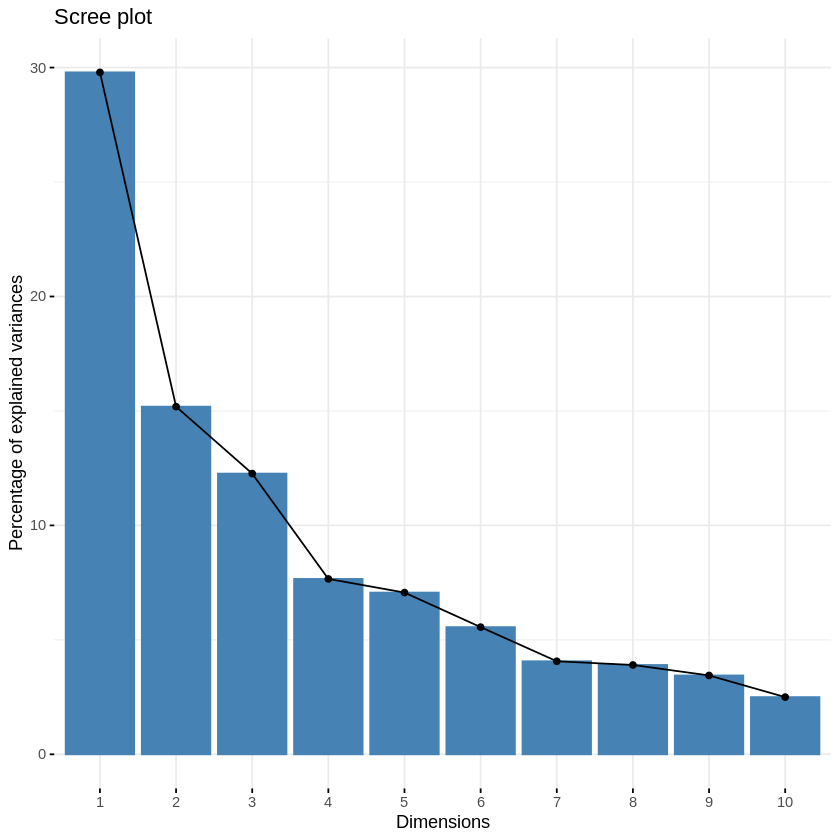

In [ ]:
factoextra::fviz_screeplot(res.pca, ncp = 10)

En la anterior gráfica se visualiza los componentes construidos anteriormente del primero al número 10 y el porcentaje de varianza explicada que representa cada uno. Es evidente, que el primer codo se forma del primero al segundo componente, con lo cual se puede inferir que hasta ese punto se debería realizar el análisis teniendo en cuenta el porcentaje acumulado de varianza. Sin embargo, se ve el cambio marcado gracias a la magnitud de la varianza entre el primero y el segundo componente. Por esto, nos debemos orientar por el segundo codo que encontramos del componente cuarto a quinto ya que a partir de allí las varianzas son muy similares y de menor magnitud.

####**Coordenadas**

In [ ]:
print(res.pca$var$coord)

                            Dim.1       Dim.2       Dim.3       Dim.4
Housing               -0.69116536 -0.08076273  0.45387613  0.43186896
Cost.of.Living        -0.58413014  0.28685377  0.47383764  0.41509465
Startups               0.40316889  0.77644706 -0.01767245 -0.05652713
Venture.Capital        0.53047585  0.68694227 -0.02923425 -0.14087032
Travel.Connectivity    0.47496139  0.23021521  0.48337456 -0.18355625
Commute                0.25705635 -0.03291101  0.72938175  0.26265730
Business.Freedom       0.84877962 -0.15717010 -0.03605569  0.29807171
Safety                 0.09322604 -0.45316032  0.48561253 -0.50631727
Healthcare             0.63400443 -0.38090258  0.40692955  0.11386170
Education              0.90688704  0.08290615  0.10121955  0.07609718
Environmental.Quality  0.73390349 -0.41044684 -0.07069590  0.12289710
Economy                0.61233908  0.11372365 -0.45002863  0.29762381
Taxation              -0.05798089 -0.16878499  0.02813816 -0.16887097
Internet.Access     

En este apartado de las afectaciones de cada variable sobre cada uno de los componentes podemos evidenciar las siguientes particularidades:

> **Componente 1:** Para este primer componente, encontramos afectaciones en su mayoría positivas a excepción de tres variables (housing, cost of living y taxation). Dentro de las de mayor significancia con puntajes mayores al 0.70, encontramos education con un 0.90, seguida de business freedom con una afectación de 0.84 y environmental quality con 0.73.


> **Componente 2:** Esta muy balanceado entre afectaciones positivas y afectaciones negativas. Dentro del primer grupo, las variables más significativas corresponden a startups (0.77), venture capital que está altamente correlacionada con la anterior (0.68), leisure and culture (0.58) y outdoors con 0.30, mientras que dentro del segundo grupo con la mayor significancia encontramos tolerance (-0.57), safety (-0.45) y healthcare (-0.38).






####**Contribuciones**

In [ ]:
print(res.pca$var$contrib)

                            Dim.1       Dim.2       Dim.3       Dim.4
Housing                9.43258625  0.25262656  9.88166998 14.31949285
Cost.of.Living         6.73730306  3.18697150 10.76997669 13.22872337
Startups               3.20952580 23.34967050  0.01498129  0.24532256
Venture.Capital        5.55645872 18.27668970  0.04099581  1.52357098
Travel.Connectivity    4.45434112  2.05269807 11.20787418  2.58679499
Commute                1.30473862  0.04195073 25.51910563  5.29666646
Business.Freedom      14.22514643  0.95674662  0.06235958  6.82126900
Safety                 0.17160952  7.95354594 11.31189663 19.68199613
Healthcare             7.93690979  5.61933432  7.94317475  0.99535723
Education             16.23952230  0.26621382  0.49145578  0.44459118
Environmental.Quality 10.63517794  6.52485539  0.23974200  1.15959659
Economy                7.40373404  0.50090880  9.71484673  6.80078424
Taxation               0.06637991  1.10337901  0.03797931  2.18944314
Internet.Access     

En la visualización referente a la representatividad de cada variable para cada uno de los componentes, por destacar se encuentran los siguientes aspectos:

> **Componente 1:** Hay tres variables que representan una magnitud entre el 10% al 20% y que corresponden a las más significativas, estas son en orden de importancia educación (16.2%), business freedom (14.2%) y environmental quality (10.6%). Las demás 15 variables tienen una representación menor al 10%.

> **Componente 2:** En este componente, la variable que lidera con una mayor participación es  startups con un 23.3%, seguida de venture capital (18.2%), leisure and culture (13.4%) y tolerance con 12.7%. Las variables restantes, al igual que el anterior componente tienen una representación menor al 10%, incluso más baja que 7%.




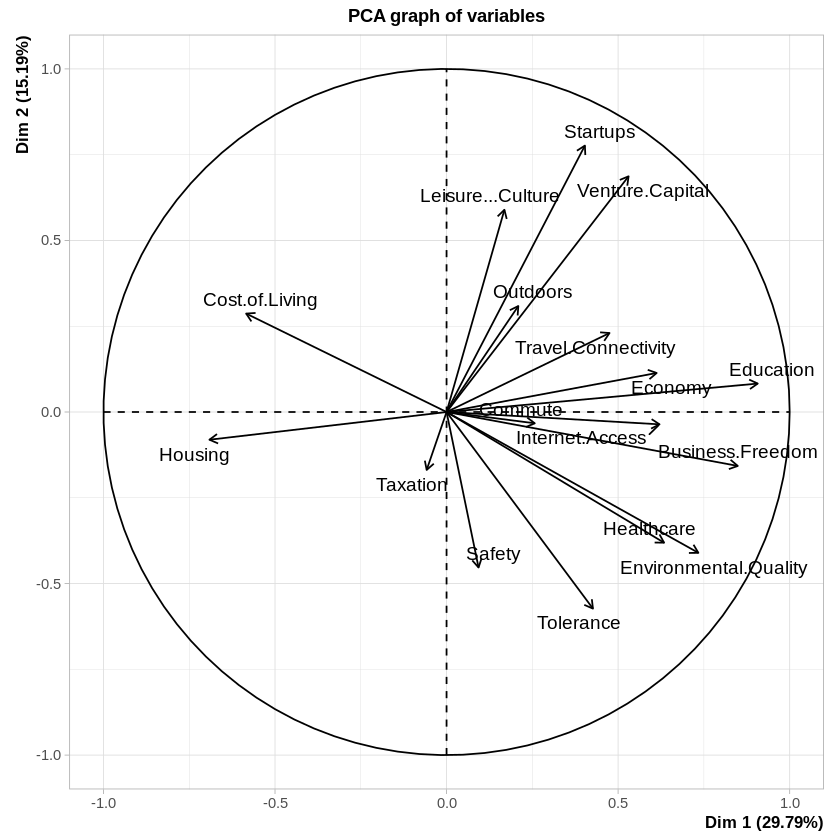

In [ ]:
FactoMineR::plot.PCA(res.pca, axes = c(1, 2), choix = "var") 

Esta gráfica es una representación de la explicación sobre contribuciones en el apartado anterior. 

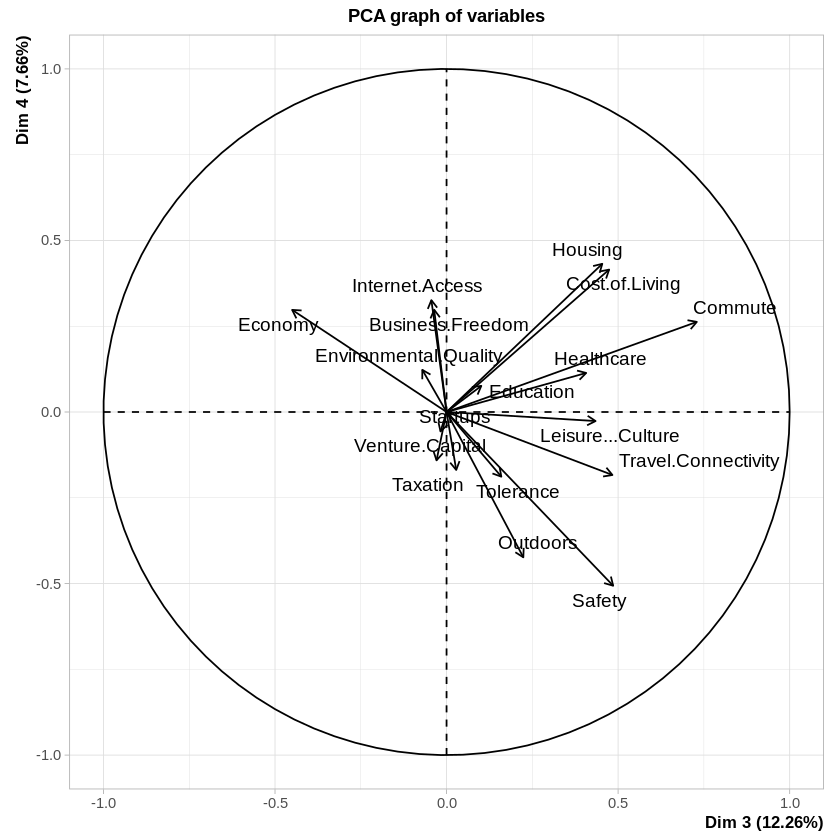

In [ ]:
FactoMineR::plot.PCA(res.pca, axes = c(3, 4), choix = "var") 

Contrario a la anterior gráfica, al analizar las variables a partir de los componentes 3 y 4, se puede observar que en su gran mayoría están cerca al origen, por lo cual no se identifican de manera evidente con algún componente en específico. Además, por la poca representatividad de estos últimos en la varianza original, las direcciones de las variables no deberían ser tomadas con mucha seriedad. 

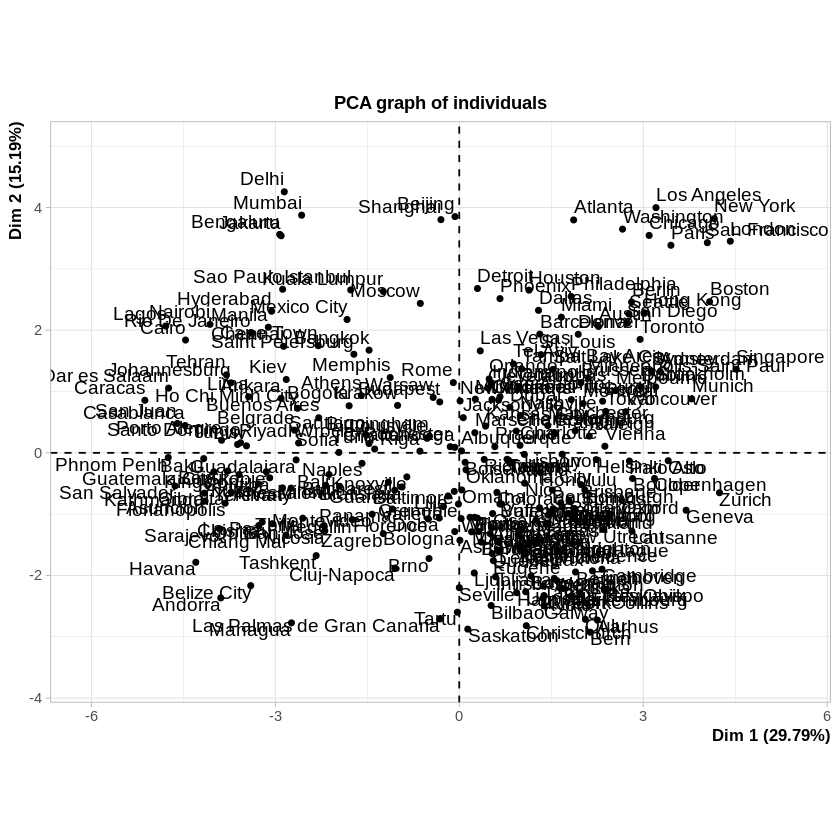

In [ ]:
FactoMineR::plot.PCA(res.pca, axes = c(1, 2), choix = "ind")

Al realizar la gráfica PCA por individuos a partir de los dos componentes principales, que en suma alcanzan a explicar el 45% de la varianza original, se encuentran varias agrupaciones de ciudades de un mismo país o continente, que seguramente comparten características similares de acuerdo a alguna variable. Por ejemplo, en la parte superior derecha se pueden observar ciudades del continente norteamericano, en la parte inferior derecha ciudades europeas en su gran mayoría. En la parte izquierda ciudades de Sur América, Asia, Centro América y solo algunas de la parte del mediterráneo. 

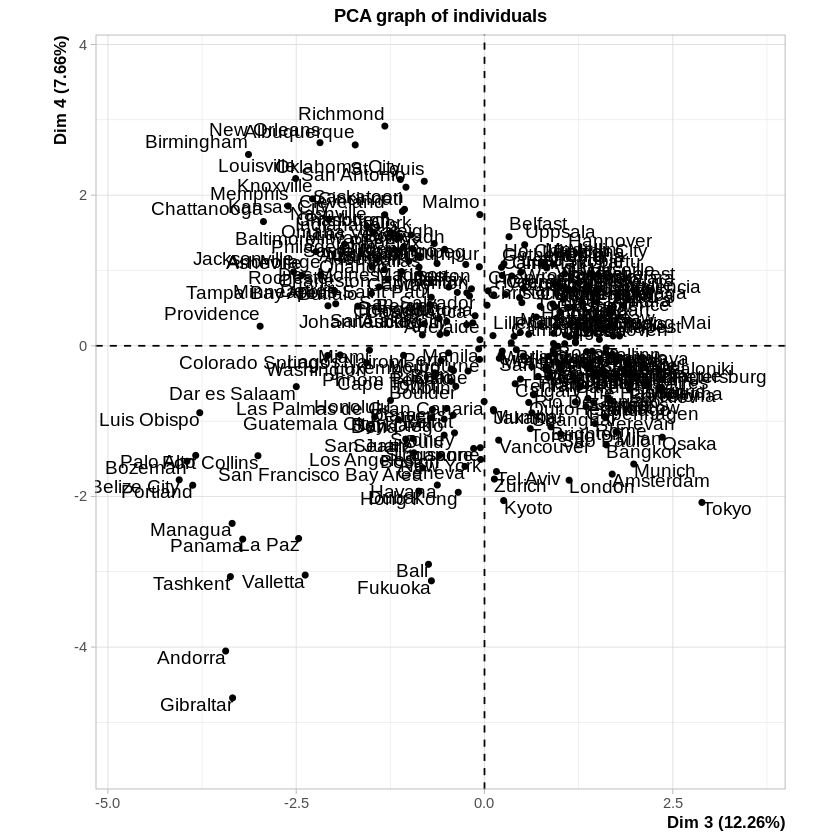

In [ ]:
FactoMineR::plot.PCA(res.pca, axes = c(3, 4), choix = "ind")



Al realizar la gráfica PCA por individuos (ciudades) a partir de los componentes 3 y 4, se puede observar que, contrario a lo que se veía en la gráfica de los dos componentes principales, acá no se ven grupos de ciudades de alguna ciudad o región en particular, y en su gran mayoría, están agrupadas en el origen de la gráfica, es decir que no se asocian de manera tan marcada a algún componente en específico. No obstante, existen algunos outliers en la parte inferior izquierda de la gráfica (Andorra y Gibraltar), que están sumamente asociadas al componente 4, y no tanto al componente 3 en su parte positiva, esto es relevante, ya que, cuando se observe la gráfica conjunta entre variables e individuos, se podrá sacar una conclusión específica sobre el comportamiento de estas ciudades. 





Warning message:
“ggrepel: 144 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


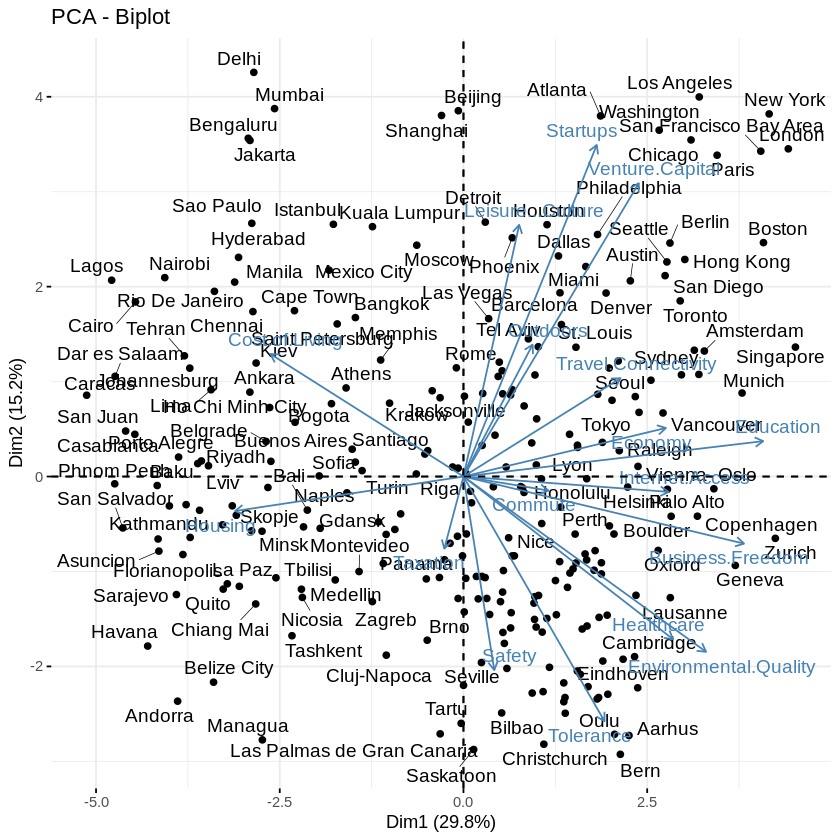

In [ ]:
factoextra::fviz_pca_biplot(res.pca, axes = c(1, 2), repel = TRUE)

De manera probable, esta es la gráfica más diciente sobre el comportamiento de las ciudades según variables. Por ejemplo, en la parte superior derecha, se puede observar esa agrupación de ciudades norteamericanas anteriormente mencionada, y su fuerte asociación a variables como Startups y Venture Capital, lo cual sigue la intuición de que en esta región el ámbito empresarial se desarrolla con mucha fuerza. Así mismo, se encuentra que, un poco más abajo, aparecen ciudades como Boston, Amsterdam, Munich y Sydney, que tienen una fuerte asociación a travel conectivity, economy, entre otras. En la parte inferior derecha, se pueden observar otra importante cantidad de ciudades europeas como Oxford, Cambridge, Zurich e Eindhoven, que tienen una fuerte relación con variables como Education, Environmental Quality, Tolerance y Healthcare, esto también sigue la intuición de que este tipo de ciudades cuentan con estándares de calidad de vida muy altos en múltiples dimensiones. 

Si se observa la parte izquierda de la gráfica, más ajustadas a la dimensión 2, se encuentran ciudades pertenecientes, en su mayoría, a zonas menos desarrolladas del mundo, como Suramérica, Centroamérica y África. Las cuales no están asociadas a la mayoría de variables de la parte derecha, pero si comparten algunas como Housing, Cost of Living y Taxation. Una gran conclusión que se puede extraer es que, en la parte derecha de la gráfica se encuentran las ciudades de las regiones más desarrolladas del mundo, las cuales tienen altos indicadores en variables como Economía, Educación, Salud, Seguridad, Tolerancia, entre otras. Por otra parte, en la parte izquierda se encuentran las ciudades menos avanzadas en estos aspectos, pero que se caracterizan por ser lugares con costos de vivienda y de vida relativamente bajos.

Warning message:
“ggrepel: 211 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


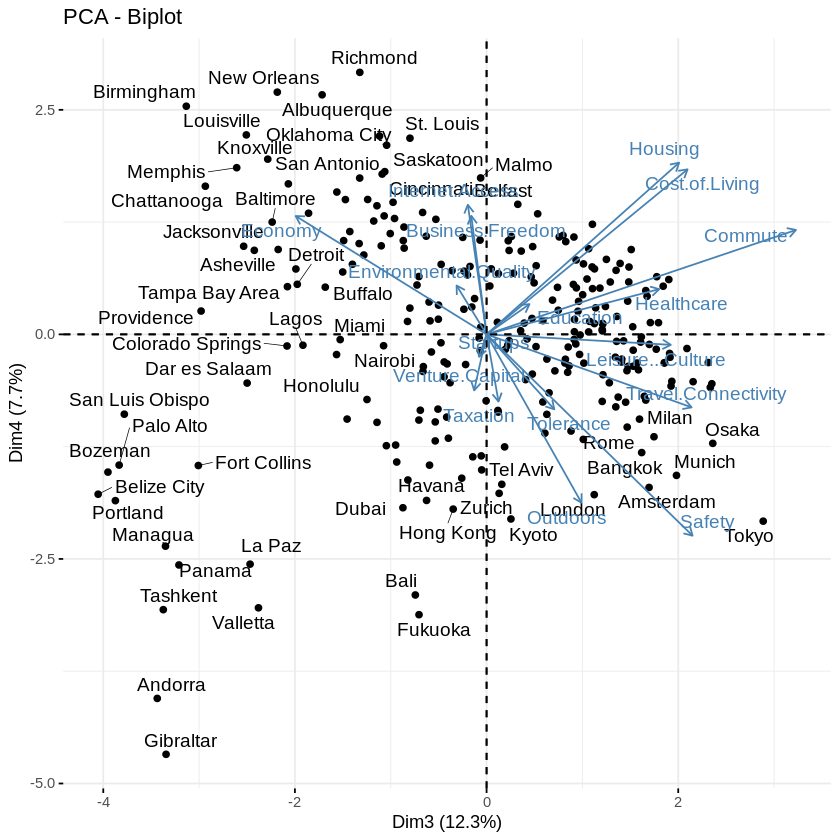

In [ ]:
factoextra::fviz_pca_biplot(res.pca, axes = c(3, 4), repel = TRUE)

De manera contraria a la anterior gráfica entre variables e individuos, al realizar la gráfica a partir de los componentes 3 y 4, que no explican de manera importante la varianza original, no se encuentran grupos de ciudades de la misma región relacionadas con alguna variable en particular. 

###**Clusters**

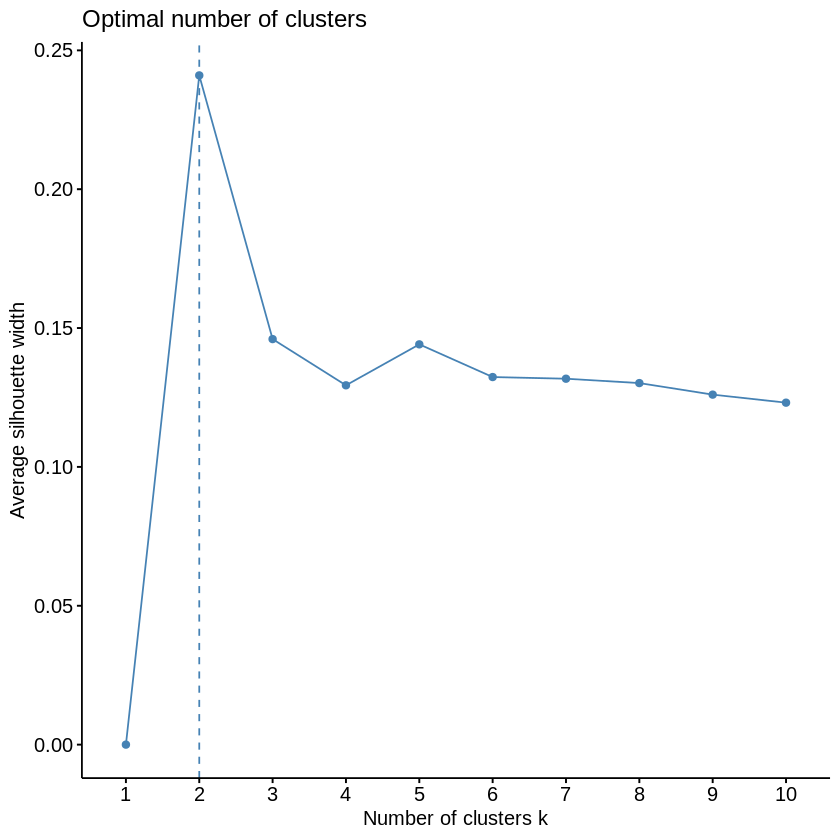

In [ ]:
factoextra::fviz_nbclust(scale(QualityLife), hcut, method = "silhouette")  

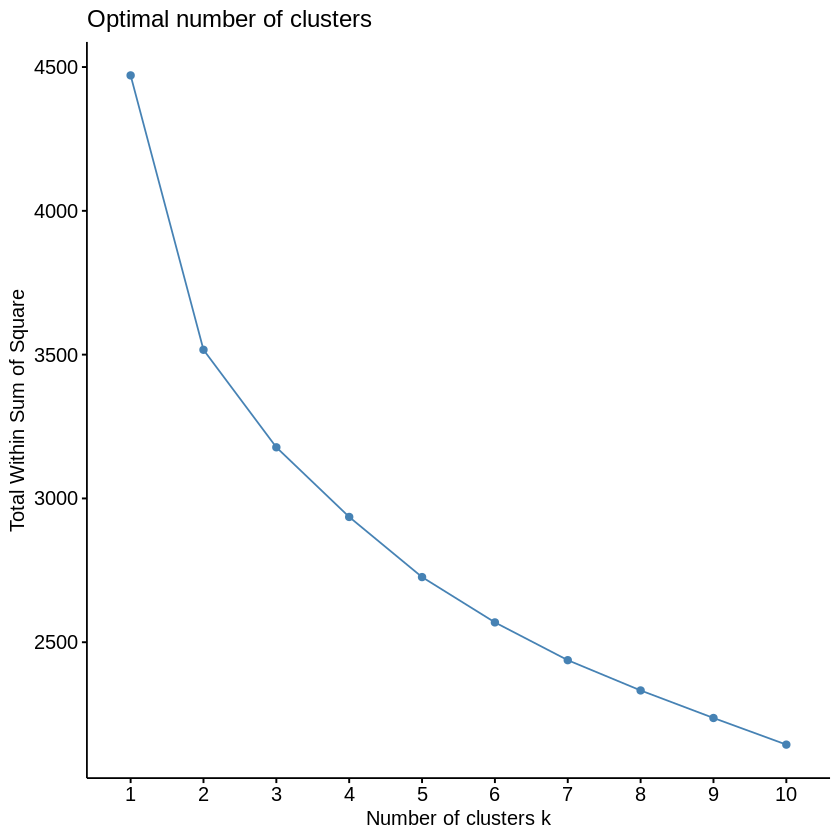

In [ ]:
factoextra::fviz_nbclust(scale(QualityLife), hcut, method = "wss")

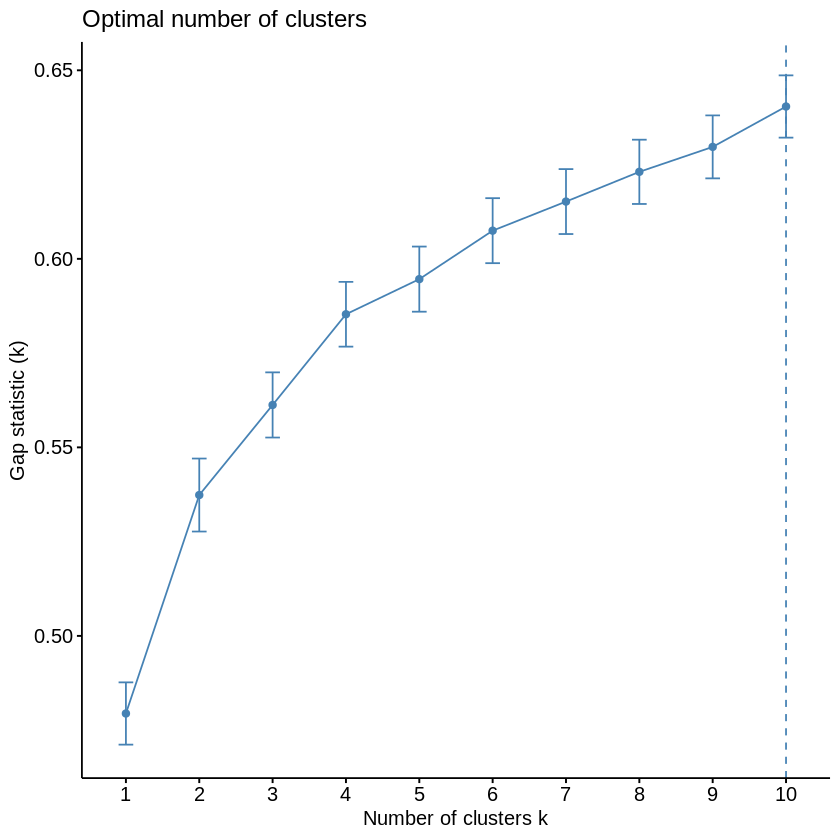

In [ ]:
factoextra::fviz_nbclust(scale(QualityLife), hcut, method = "gap_stat")

Dentro del conjunto de las observaciones, se realiza una segmentación con la finalidad de encontrar una asignación de los clusters, en donde cada una de las gráficas se desarrolla por un método en específico.

**Método Silhouette:**  Este método considera como resultado un número óptimo de clusters que maximiza la media de los índices del silhouette de todas las observaciones, que en este caso son 2. Al realizar la estimación se permite ver la asignación de una variable en relación con el resto de las variables analizadas del cluster, por lo tanto, cuantifica la observación que se obtuvo en las observaciones del cluster. 

**Método WSS:** Para este método igualmente se considera el número óptimo de 2 clusters para el total de las observaciones. A partir de la curva obtenida, se puede evidenciar cómo a medida que aumenta el número de centroides, el valor de la suma de los cuadrados (wss), va disminuyendo de tal manera que la grafica adopta una forma de codo. 

**Método Gap_stat:** Por medio del método de gap stat, se da como resultado la gráfica anteriormente presentada, donde nos permite identificar un óptimo de 10 agrupaciones en el cluster, encontrando el valor de k el cual nos permitirá maximizar el número total de clusters de las observaciones, que están más alejadas de una distribución aleatoria. No obstante, hay que tener en cuenta que este método es castigado cuando existen muchas variables (como es el caso), por lo cuál su resultado no debería tomarse muy en serio. 


####**K-Medias**

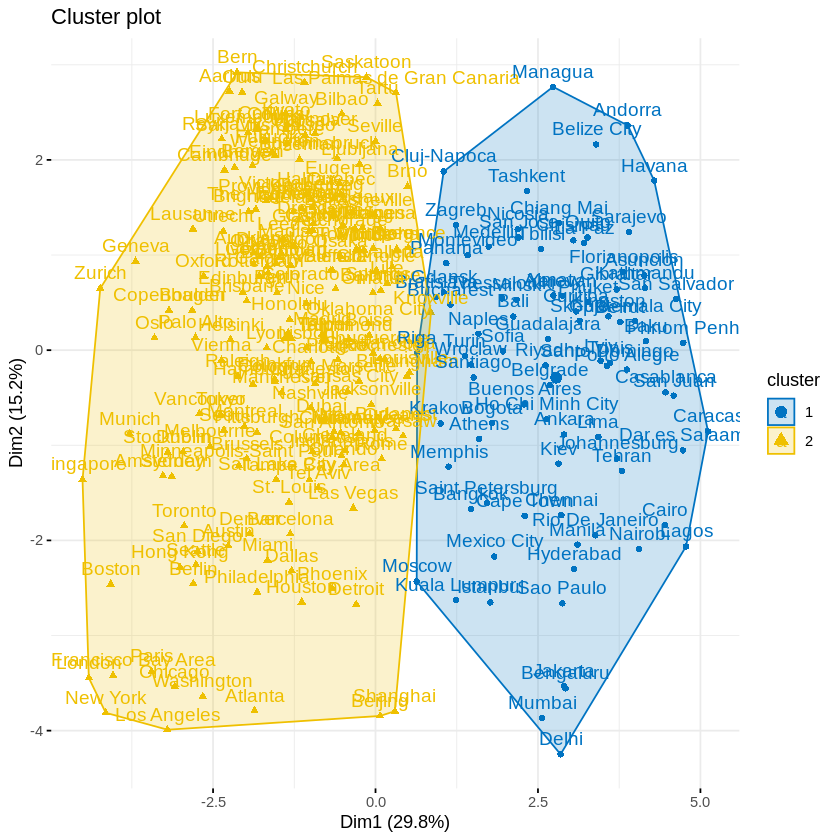

In [ ]:
set.seed(123)
km.res <- kmeans(scale(QualityLife), 2, iter.max = 10000)
?kmeans
fviz_cluster(km.res, data = QualityLife,
            ellipse.type = "convex",
            palette = "jco",
            ggtheme = theme_minimal()) 

Dada la recomendación de los tres anteriores métodos orientado a la construcción de 2 clusters, las ciudades más creativas del mundo se agrupan en las 2 clasificaciones siguientes de acuerdo a su nivel de calidad de vida medidas por variables de diferente índole, estas son variables económicas, sociales y culturales, ambientales y empresariales:

 *   **GRUPO 1:** Se encuentran 86 ciudades que coinciden con los países menos desarrollados del continente de África como Nigeria y Kenia, países en desarrollo encontramos ciudades de Suramérica y América Central como Sao Paulo, Ciudad de México y Buenos Aires o las economías emergentes de Asia y Europa como las ciudades de India y Grecia. 
 *   **GRUPO 2:** En esta agrupación encontramos 178 ciudades, es decir se duplica la cantidad del primer grupo teniendo en cuenta que la mayoría de las observaciones corresponden a ciudades del continente europeo que coinciden con los países desarrollados. Se destaca las ciudades de grandes potencias mundiales como Estados Unidos y la Unión Europea pero también las economías gigantes de Asia. Es por lo anterior, que se observa ciudades como Nueva York, Shangai, Zurich, Las Vegas, Toronto, Genova, Barcelona entre otras.

In [ ]:
grupos = as.factor(km.res$cluster) ; print(grupos)

                    Aarhus                   Adelaide 
                         2                          2 
               Albuquerque                     Almaty 
                         2                          1 
                 Amsterdam                  Anchorage 
                         2                          2 
                   Andorra                     Ankara 
                         1                          1 
                 Asheville                   Asuncion 
                         2                          1 
                    Athens                    Atlanta 
                         1                          2 
                  Auckland                     Austin 
                         2                          2 
                      Baku                       Bali 
                         1                          1 
                 Baltimore                    Bangkok 
                         2                          1 
          

In [ ]:
DF = as.data.frame(grupos);
DF

,grupos
,<fct>
Aarhus,2
Adelaide,2
Albuquerque,2
Almaty,1
Amsterdam,2
Anchorage,2
Andorra,1
Ankara,1
Asheville,2


In [ ]:
DF$Country.Name = rownames(DF)

In [ ]:
DF[DF$grupos == '1', ]

,grupos,Country.Name
,<fct>,<chr>
Almaty,1,Almaty
Andorra,1,Andorra
Ankara,1,Ankara
Asuncion,1,Asuncion
Athens,1,Athens
Baku,1,Baku
Bali,1,Bali
Bangkok,1,Bangkok
Beirut,1,Beirut


In [ ]:
DF[DF$grupos == '2', ]

,grupos,Country.Name
,<fct>,<chr>
Aarhus,2,Aarhus
Adelaide,2,Adelaide
Albuquerque,2,Albuquerque
Amsterdam,2,Amsterdam
Anchorage,2,Anchorage
Asheville,2,Asheville
Atlanta,2,Atlanta
Auckland,2,Auckland
Austin,2,Austin


In [ ]:
media_group = apply(QualityLife, 2 , function(x) tapply(x, grupos, mean)) ; print(media_group)

   Housing Cost.of.Living Startups Venture.Capital Travel.Connectivity  Commute
1 8.332500       7.564616 4.003297        1.412953            2.450390 4.303067
2 5.582346       4.871489 4.869385        3.308511            3.921764 4.784188
  Business.Freedom   Safety Healthcare Education Environmental.Quality  Economy
1         4.882798 7.059395   5.468070  1.284000              3.814584 3.705355
2         8.496624 6.939438   7.432725  5.059008              7.160504 5.701419
  Taxation Internet.Access Leisure...Culture Tolerance Outdoors
1 5.322070        3.713924          5.670378  5.900512 4.372820
2 4.775152        5.917008          5.733545  7.218230 4.558772


In [ ]:
max_group = apply(QualityLife, 2 , function(x) tapply(x, grupos, max)) ; print(max_group)

  Housing Cost.of.Living Startups Venture.Capital Travel.Connectivity Commute
1  10.000         10.000       10           9.099              9.0545 5.91375
2   8.961          8.192       10          10.000             10.0000 6.72850
  Business.Freedom  Safety Healthcare Education Environmental.Quality Economy
1            8.671  9.5535   8.367667    4.6625               7.79450   7.042
2           10.000 10.0000   9.320667    9.7110               9.95325   9.390
  Taxation Internet.Access Leisure...Culture Tolerance Outdoors
1       10           9.638                10    9.7100   7.7765
2       10           9.716                10    9.7385   7.9330


In [ ]:
min_group = apply(QualityLife, 2 , function(x) tapply(x, grupos, min)) ; print(min_group)

  Housing Cost.of.Living Startups Venture.Capital Travel.Connectivity Commute
1   1.112              0        1               0              0.5000       0
2   0.000              0        0               0              0.8335       0
  Business.Freedom Safety Healthcare Education Environmental.Quality Economy
1         0.000000 2.8585      0.000    0.0000                1.0000  0.0000
2         3.815333 1.3435      4.154    1.4335                2.0555  3.3625
  Taxation Internet.Access Leisure...Culture Tolerance Outdoors
1    0.500           1.000            1.0645     1.406      0.5
2    1.426           2.566            0.0000     2.741      0.5


Para el score promedio por grupos, podemos analizar las variables por agrupaciones:

**1.	Variables económicas:** En esta agrupación tenemos un comportamiento muy variado dado que si nos remitimos a Housing tiende a destacarse los países en desarrollo o emergentes dado que son en los lugares donde los Gobiernos están impulsando constantemente los programas que benefician a los diferentes grupos poblacionales para el acceso a vivienda propia y su costo es más bajo en comparación a los países desarrollados, por lo que se facilita aún más el acceso a este bien. 
Por otra parte, es evidente que para la variable de economía se destaca el segundo grupo dado que su producción nacional es más diversificada y genera mayor valor agregado, por lo que se caracterizan por tener producciones estructuradas, a gran escala e industrias bien consolidadas y así mismo, una riqueza nacional por habitante mucho mayor que en las economías emergentes.
Para la variable de impuestos, el score es muy similar. Sin embargo, por 0.6 se destaca los países menos desarrollados, esto se debe a factores como la recaudación, el pago, las tasas y la estructura de las instituciones que lideran los procesos.

**2.	Variables culturales y sociales:** En el acceso a internet, hay una amplia diferencia debido a que en el grupo 2 se cuenta con mayores sistemas de conexión y redes en los diferentes lugares de los países mientras que en los países en desarrollo aún falta tecnologías que promuevan una mejora en la calidad de conexión para las zonas urbanas y así mismo, una mayor organización y estructuración para la conexión en zonas rurales. 
El promedio de la variable cultura es bastante similar en los dos grupos y se da por el hecho de que así tengan arraigos culturales diferentes, el entretenimiento siempre ha resaltado en las sociedades de diferentes maneras y ha sido un factor fundamental para la vida social de los individuos. 
Finalmente, en tolerancia se destaca de manera significativa los países desarrollados por el mayor respeto que tienen hacia las minorías y la comunidad LGBTI con respecto a sus decisiones y creencias. En el grupo 1, aún se tienen preceptos complejos que no permiten la aceptación de estas comunidades.

**3.	Variables demográficas:** Con la variable de costo de vida; en el grupo 1 se tiene un score promedio mayor porque es más barato vivir en las ciudades relacionadas en esta agrupación y la canasta de bienes y servicios involucrada en esta variable es más económica que en los países desarrollados donde el poder adquisitivo es mayor.
Para las variables de salud y educación, las diferencias son evidentes entre los grupos, para salud de 2 puntos y en educación lo duplica con 4 puntos aproximadamente, la cobertura y calidad de los sistemas de salud en las economías europeas con su modelo de Estado de Bienestar es mucho mejor que las deficiencias que reporta el primer grupo. Por la parte de educación, siempre se han destacado los resultados de las pruebas PISA en los países desarrollados por los modelos y metodologías de educación que manejan.
Finalmente, en la variable de travel connectivity la ventaja del grupo 2 sobre el grupo 1 se debe a las redes férreas y los sistemas de transporte que cada vez son más organizados y sofisticados que en los países en desarrollo.

**4.	Variables empresariales:** En esta agrupación para las tres variables de startups, venture capital y business freedom, es clara la ventaja de los países desarrollados sobre los emergentes o en desarrollo dado que en las ciudades de grandes potencias son bastantes las iniciativas empresariales que los Gobiernos brindan para la creación de nuevos negocios y el financiamiento por parte de inversionistas es más atractivo en estos lugares por la rentabilidad obtenida y la estructura organizacional.

**5.	Variables ambientales:** Para la calidad del medio ambiente, el score promedio del grupo 2 duplica el score del grupo 1 y las razones principales de este resultado son la implementación de las nuevas tecnologías útiles para desarrollar energías renovables que suavicen el efecto destructor al medio ambiente en sus recursos naturales, la consciencia de la ciudadanía en el cuidado de recursos y la promulgación de las iniciativas de protección de calidad del aire y del agua.
Con lo anterior se concluye que, si se quiere mejorar la calidad de vida y los indicadores de los diferentes ámbitos que están detrás de este concepto en las ciudades que no son tan destacadas para este campo, es necesario replicar las estrategias de las ciudades creativas más destacadas para cada variable teniendo en cuenta la caracterización de la ciudad en la que se quiere mejorar y las condiciones de vida de sus habitantes.


####**K-Medoids**

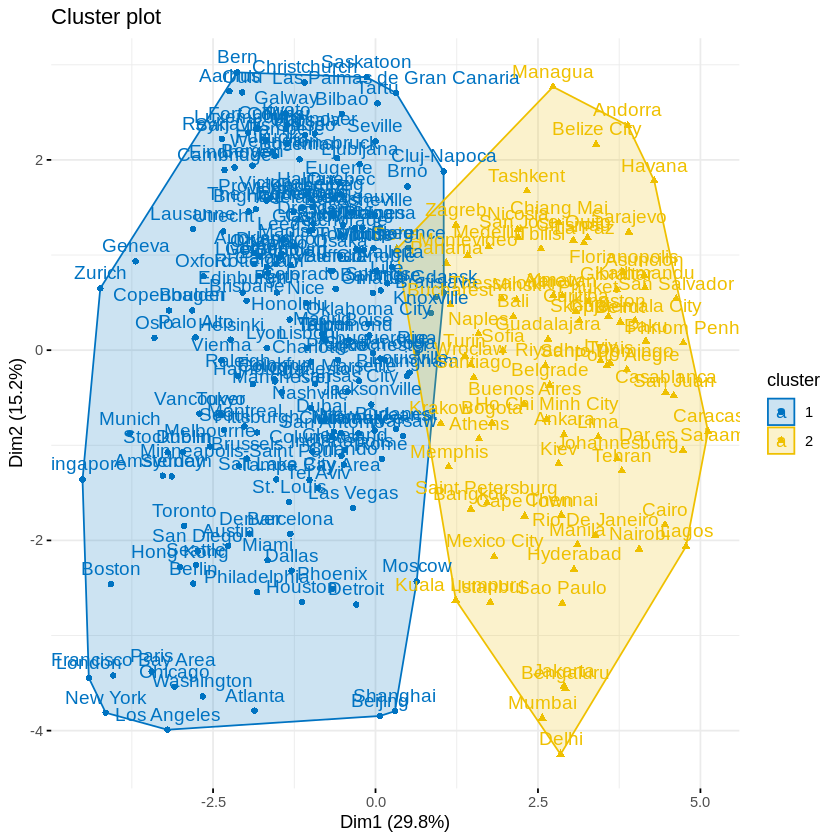

In [ ]:
set.seed(123)
kmed.res <- pam(scale(QualityLife), 2)
fviz_cluster(kmed.res, data = QualityLife, 
             ellipse.type = "convex", 
             palette = "jco",
             ggtheme = theme_minimal())

In [ ]:
grupo3 = as.factor(kmed.res$cluster) ; print(grupo3)

                    Aarhus                   Adelaide 
                         1                          1 
               Albuquerque                     Almaty 
                         1                          2 
                 Amsterdam                  Anchorage 
                         1                          1 
                   Andorra                     Ankara 
                         2                          2 
                 Asheville                   Asuncion 
                         1                          2 
                    Athens                    Atlanta 
                         2                          1 
                  Auckland                     Austin 
                         1                          1 
                      Baku                       Bali 
                         2                          2 
                 Baltimore                    Bangkok 
                         1                          2 
          

In [ ]:
DF3 = as.data.frame(grupo3);
DF3

,grupo3
,<fct>
Aarhus,1
Adelaide,1
Albuquerque,1
Almaty,2
Amsterdam,1
Anchorage,1
Andorra,2
Ankara,2
Asheville,1


In [ ]:
DF3$Country.Name = rownames(DF3)
DF3[DF3$grupo3 == '1', ]


,grupo3,Country.Name
,<fct>,<chr>
Aarhus,1,Aarhus
Adelaide,1,Adelaide
Albuquerque,1,Albuquerque
Amsterdam,1,Amsterdam
Anchorage,1,Anchorage
Asheville,1,Asheville
Atlanta,1,Atlanta
Auckland,1,Auckland
Austin,1,Austin


In [ ]:
DF3[DF3$grupo3 == '2', ]

,grupo3,Country.Name
,<fct>,<chr>
Almaty,2,Almaty
Andorra,2,Andorra
Ankara,2,Ankara
Asuncion,2,Asuncion
Athens,2,Athens
Baku,2,Baku
Bali,2,Bali
Bangkok,2,Bangkok
Beirut,2,Beirut


In [ ]:
media_group3 = apply(QualityLife, 2 , function(x) tapply(x, grupo3, mean)) ; print(media_group3)

   Housing Cost.of.Living Startups Venture.Capital Travel.Connectivity  Commute
1 5.673415       4.950049 4.851926        3.274049            3.935964 4.804488
2 8.264524       7.521622 3.999799        1.396976            2.347098 4.234543
  Business.Freedom   Safety Healthcare Education Environmental.Quality  Economy
1         8.435799 6.961376   7.396189  5.044728              7.160791 5.637582
2         4.841516 7.016555   5.453325  1.131549              3.650732 3.749671
  Taxation Internet.Access Leisure...Culture Tolerance Outdoors
1 4.773604        5.937799          5.751984  7.196025 4.570212
2 5.352183        3.560311          5.626372  5.885518 4.338360


In [ ]:
max_group3 = apply(QualityLife, 2 , function(x) tapply(x, grupo3, max)) ; print(max_group3)

  Housing Cost.of.Living Startups Venture.Capital Travel.Connectivity Commute
1   9.165          8.794       10          10.000             10.0000 6.72850
2  10.000         10.000       10           9.099              5.8805 5.91375
  Business.Freedom  Safety Healthcare Education Environmental.Quality Economy
1           10.000 10.0000   9.320667    9.7110               9.95325   7.886
2            8.671  9.5535   8.367667    4.6625               7.75725   9.390
  Taxation Internet.Access Leisure...Culture Tolerance Outdoors
1       10           9.716                10    9.7385   7.9330
2       10           9.638                10    9.7100   7.7765


In [ ]:
min_group3 = apply(QualityLife, 2 , function(x) tapply(x, grupo3, min)) ; print(min_group3)

  Housing Cost.of.Living Startups Venture.Capital Travel.Connectivity Commute
1   0.000              0        0               0              0.8335       0
2   1.112              0        1               0              0.5000       0
  Business.Freedom Safety Healthcare Education Environmental.Quality Economy
1         3.815333 1.3435      4.154      2.28                2.0555   3.148
2         0.000000 2.8585      0.000      0.00                1.0000   0.000
  Taxation Internet.Access Leisure...Culture Tolerance Outdoors
1    1.426           2.566            0.0000     2.741      0.5
2    0.500           1.000            1.0645     1.406      0.5


Con el método k-Medoids podemos evidenciar por medio de la gráfica, una agrupación de 2 clusters. El grupo 1 que esta representado de color azul, agrupa las ciudades más desarrolladas, y el grupo 2 que esta representado por el color amarillo, agrupa las ciudades menos desarrolladas o ciudades emergentes. Es importante resaltar, la diferencia que se encuentra con el método de K-Medias, ya que en ese caso se catalogan los grupos de forma inversa, es decir, el grupo 1 agrupa las ciudades emergentes y el grupo 2 las ciudades más desarrollas. Debido a que estos métodos tienen una diferencia de 3 o 4 ciudades aproximadamente, los indicadores no cambian mucho en el análisis grafico y no hay mayor diferencia. 

En términos generales, los valores correspondientes a la media nos indican que para variables como Housing, Cost of Living, Taxation, son los valores más altos para el grupo de ciudades emergentes, y podemos decir que el costo de vida llega a ser más económicos por esta puntuación alta. En cambio, variables dicientes como; Venture capital, Business freedom, Education, tiene valores mucho mas altos para el grupo de ciudades desarrolladas, hay que resaltar que la mayoría de ciudades desarrolladas hacen parte del continente de Europa, y estas ciudades se caracterizan por su buena calificación en indicadores de educación, de territorios altamente integrados en la industria e indicadores socioeconómicos, por ende, da u puntaje más alto para estas variables.   

En cuanto a los valores máximos, podemos ver que el grupo 2 el cual agrupa las ciudades menos desarrolladas, tiene puntuaciones más altas para ciertos indicadores como lo son: Housing, Cost of Living, Economy. Para las demás variables, el grupo 1 el cual agrupa las ciudades mas desarrolladas, tienen un mayor índice en las demás variables de calidad de vida. Lo que nos indica que, al ser ciudades desarrolladas las variables van a tener mayor incidencia en la calidad la calidad de vida de las ciudades analizadas. 
